## <font color='blue'>Ejercicio 1: EL PROBLEMA DEL SOBREAJUSTE (2 puntos)</font>

<font color='blue'>Aprendizaje Automático (AA) es la rama de la Inteligencia Artificial (IA) que se ocupa de diseñar e implementar máquinas que sean capaces de aprender a realizar una determinada tarea a partir de los propios datos (es decir, sin necesidad de ser programadas explícitamente para ello). El principal objetivo de los modelos de AA es realizar predicciones/estimaciones más allá de los conjuntos de datos con los que fueron entrenados y, como es lógico, se pretende que dichos modelos sean capaces de $generalizar$ más allá de los ejemplos vistos en entrenamiento. Como consecuencia, uno de los mayores obstáculos a los que nos enfrentamos se conoce como $sobreajuste$ ($overfitting$): el hecho de que nuestros pesos/parámetros estén demasiado apegados a nuestros ejemplos de entrenamiento, y se produzca una brecha a nivel de generalización (en donde los resultados en entrenamiento serían manifiestamente mejores que en test).

<font color='blue'>En este ejercicio intentaremos profundizar un poco en lo que es el sobreajuste, así como las causas y consecuencias del mismo.



---




<font color='blue'>Primero, importamos las librerías necesarias y fijamos la semilla aleatoria para que nuestros resultados sean reproducibles entre ejecuciones.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fijamos la semilla aleatoria
np.random.seed(42) #¿Por qué 42? https://en.wikipedia.org/wiki/Phrases_from_The_Hitchhiker%27s_Guide_to_the_Galaxy

In [2]:
import sklearn
if sklearn.__version__ < '1.3':
  # Actualizamos scikit-learn para tener la última versión.
  # Nos interesa de cara a disponer de las más recientes funcionalidades
  # (como, por ejemplo, poder usar cross_validate() empleando el parámetros return_indices=True; https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)
  !pip install scikit-learn --upgrade
else:
  print('La versión de scikit-learn es: ', sklearn.__version__)


La versión de scikit-learn es:  1.4.2






---






### <font color='blue'>Ejercicio 1.A: Regresión en 1D (1 punto)</font>

<font color='blue'> En este ejercicio se intentará aproximar una función continua unidimensional por medio de regresión lineal (`LinearRegression()`), y se irá, progresivamente, incrementando la complejidad del modelo empleando características polinomiales (`PolynomialFeatures()`), de grados $\{1, 2, 4, 8, 16, 32\}$. La función real a aproximar (nuestra $\textit{ground truth}$) es: $f(x) = cos(1.5\cdot\pi\cdot x) + sin(0.5\cdot\pi\cdot x)$.

<font color='blue'> Las tareas a realizar en este ejercicio se resumen a continuación:
1.   Completamos el código de la función real a aproximar.
2.   Generamos las entradas ($X$): 20 puntos aleatorios en el intervalo $[0,1]$.
3.   Generamos las salidas deseadas ($y$): el valor resultante de emplear la función real y sumarle un cierto error aleatorio (`np.random.randn`: distribución Normal estándar), que pretende simular el ruido que pueden contener las etiquetas ($labels$/$targets$) en cualquier problema.
4.   Generamos las características polinomiales asociadas con los grados proporcionados, y creamos un $pipeline$ (usando `Pipeline` o `make_pipeline`) con dichas características y regresión lineal.
5.   Realizamos el ajuste (`fit`) de dicho `pipeline` con $X$ e $y$, y empleamos `cross_val_score`, o `cross_validate`, para evaluar el rendimiento utilizando $\textit{10-fold cross-validation}$ y el error cuadrático medio ($MSE$) como métrica de error.
6. Mostramos figuras con ajustes. Para ello, generamos 1000 valores equiespaciados en el intervalo $[0,1]$, y realizamos la predicción de nuestro modelo (`pipeline.predict`) sobre dichos datos para mostrar, en rojo, la función que aproxima nuestro modelo entrenado. En la misma figura incluiremos, en azul, la función real empleada para generar los datos, y los puntos/muestras generadas ($X$ e $y$). El título de cada figura debe incluir el grado del polinomio.
7. Junto con estas figuras, se debe mostrar una tabla (y aquí la librería `tabulate` puede ser de utilidad) que incluya, el grado del polinomio en la primera fila ($header$ de la tabla), el número de pesos/coeficientes en la segunda, el $MSE$ (promedio y desviación típica) obtenido en entrenamiento en validación cruzada en la tercera fila, el $MSE$ (promedio y desviación típica) obtenido en test en validación cruzada en la cuarta fila, y el valor medio de los coeficientes aprendidos en valor absoluto con cada uno de los 6 modelos ajustados (incluyendo el $bias$ o $intercept$) en la última.

<font color='blue'> El alumnado debe describir en detalle el trabajo realizado y las conclusiones extraídas: ¿se observa algún patrón en los resultados obtenidos, así como en la magnitud de los coeficientes tras el entrenamiento? ¿Se observa algún fenómeno de infraentrenamiento ($underfitting$) o sobreentrenamiento ($overfitting$)? ¿Qué grado considera el más adecuado para resolver este problema? ¿Por qué?

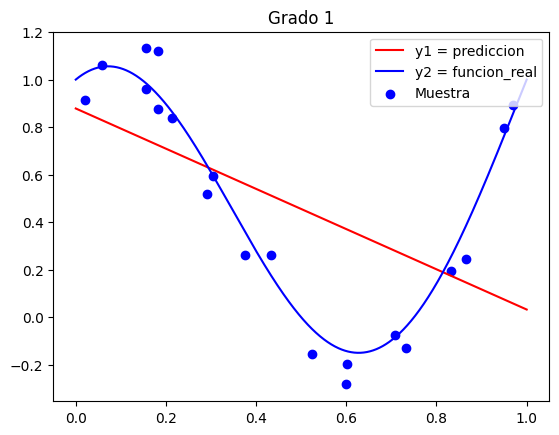

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import PolynomialFeatures

def funcionReal(X):
    return np.cos(1.5*np.pi*X)+np.sin(0.5*np.pi*X)

n_samples = 20
degrees = [1, 2, 4, 8, 16, 32]

X = np.random.rand(n_samples)
y = funcionReal(X) + np.random.randn(n_samples) * 0.1

# a cubrir por el alumnado

#Definimos vectores de todas las métricas que necesitamos guardar
n_pesos = []
mse_entr_promedio = []
mse_entr_dtip = []
mse_test_promedio = []
mse_test_dtip = []
val_medio_coefs = []

#Usamos pipeline para concatenar ambas funciones
pipeline = make_pipeline(PolynomialFeatures(1), LinearRegression())
#Hacemos reshape para que tenga la dimensión que necesita fit()
X = X.reshape(20,1)
#Hacemos el ajuste al pipeline
pipeline.fit(X,y)

#Hacemos gráfica
x = np.linspace(0,1,1000)
y1 = pipeline.predict(x.reshape(-1,1))
y2 = funcionReal(x)

fig, ax = plt.subplots()
ax.plot(x, y1, 'r', label = 'y1 = prediccion')
ax.plot(x, y2, 'b', label = 'y2 = funcion_real')
ax.scatter(X, y, color = 'b', label = 'Muestra')
legend = ax.legend(loc = 'upper right')
plt.title('Grado 1')
plt.show()

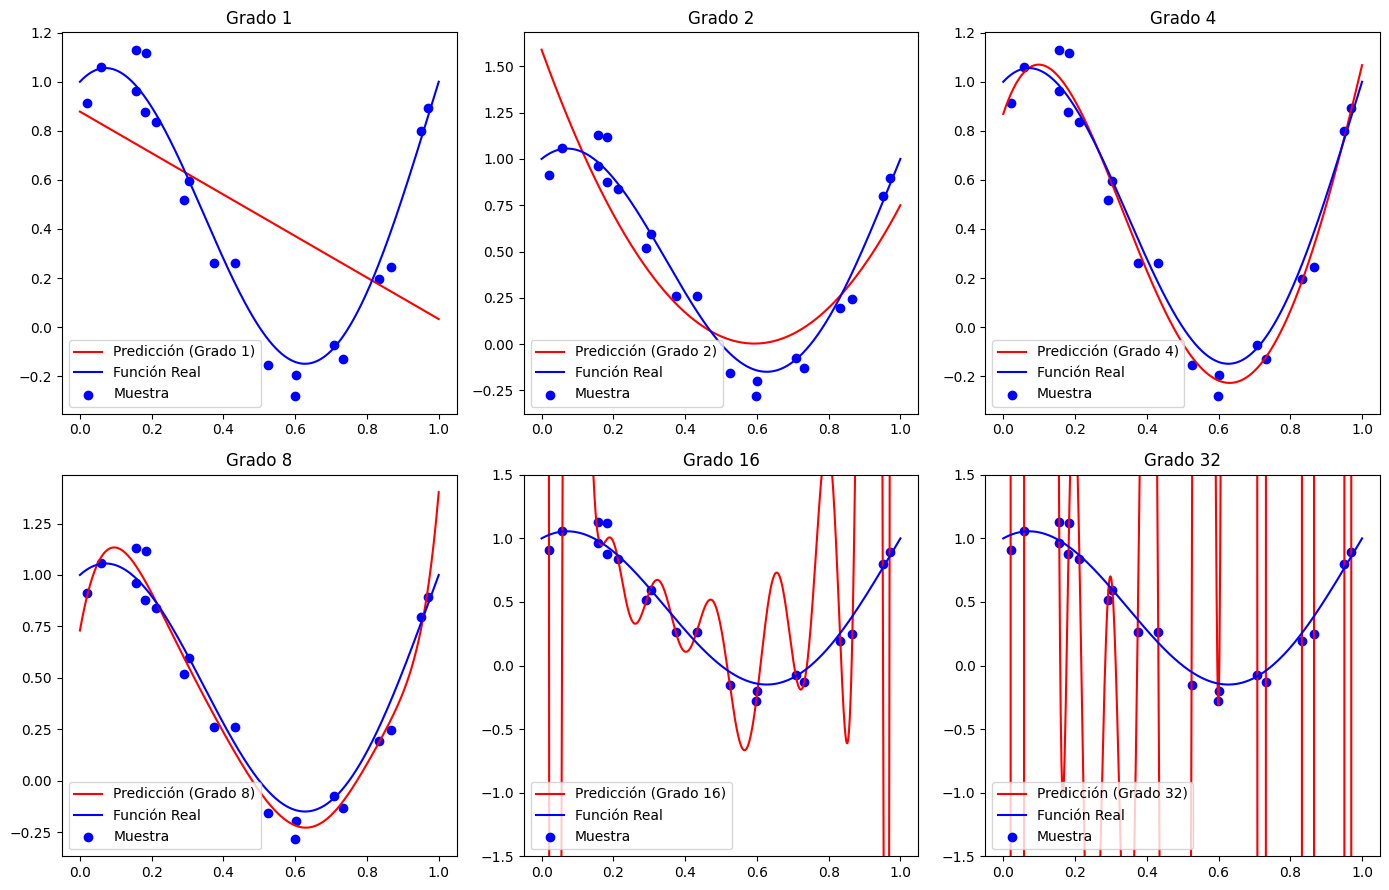

In [ ]:
#Lo hacemos para el resto de grados restantes, incluyo grado 1 para comparar
fig, ax = plt.subplots(2,3, figsize=(14, 9))

for i, degree in enumerate(degrees):

  # Calcular la posición del subplot en función del índice del grado
  fila = i // 3  # División entera para obtener la fila
  columna = i % 3  # Módulo para obtener la columna

  pipeline = make_pipeline(PolynomialFeatures(degree), LinearRegression())
  pipeline.fit(X,y)
  #Hacemos cross validation para ver el rendimiento del modelo entrenado
  score = cross_validate(pipeline,X,y,scoring='neg_mean_squared_error',cv=10, return_train_score = True) #10-fold cross validation

  #Nos quedamos con todas las métricas que nos piden
  #Valor absoluto porque 'neg_mean_squared_error' nos los devuelve negados, para desviacion tipica no hace falta
  mse_entr_promedio.append(np.mean(np.abs(score['train_score'])))
  mse_entr_dtip.append(np.std(score['train_score']))
  mse_test_promedio.append(np.mean(abs(score['test_score'])))
  mse_test_dtip.append(np.std(score['test_score']))
  val_medio_coefs.append(np.mean(np.abs(pipeline.named_steps['linearregression'].coef_) + pipeline.named_steps['linearregression'].intercept_))

  x = np.linspace(0, 1, 1000)
  y_pred = pipeline.predict(x.reshape(-1, 1))
  ax[fila, columna].plot(x, y_pred, 'r', label=f'Predicción (Grado {degree})')
  ax[fila, columna].plot(x, funcionReal(x), 'b', label='Función Real')
  ax[fila, columna].scatter(X, y, color='b', label='Muestra')
  ax[fila, columna].set_title(f'Grado {degree}')
  ax[fila, columna].legend(loc = 'lower left')

  if (degree > 8 ):
    ax[fila, columna].set_ylim(-1.5, 1.5)     #Para visualizar mejor los grado 16 y 32, pues toman valores muy altos para el eje y

  n_pesos.append(pipeline.named_steps['linearregression'].coef_.size)

plt.tight_layout()
plt.show()

In [ ]:
from tabulate import tabulate

encabezado = degrees
encabezado.insert(0,"Grado del polinomio")
fila1 = n_pesos
fila1.insert(0,"Nº de pesos")
fila2 = mse_entr_promedio
fila2.insert(0,"MSE entrenamiento Promedio")
fila3 = mse_entr_dtip
fila3.insert(0,"MSE entrenamiento DTipica")
fila4 = mse_test_promedio
fila4.insert(0,"MSE test Promedio")
fila5 = mse_test_dtip
fila5.insert(0,"MSE test DTipica")
fila6 = val_medio_coefs
fila6.insert(0,"Valor medio coefs")
tabla=[fila1]
tabla.extend([fila2, fila3, fila4, fila5, fila6])
print(tabulate(tabla, encabezado, tablefmt="rounded_outline", numalign = "center", rowalign="center"))

╭────────────────────────────┬───────────┬────────────┬─────────────┬─────────────┬─────────────┬─────────────╮
│ Grado del polinomio        │     1     │     2      │      4      │      8      │     16      │     32      │
├────────────────────────────┼───────────┼────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ Nº de pesos                │     2     │     3      │      5      │      9      │     17      │     33      │
│ MSE entrenamiento Promedio │ 0.158315  │ 0.0512122  │ 0.00544511  │ 0.00450932  │ 0.000880213 │ 0.000273102 │
│ MSE entrenamiento DTipica  │ 0.0159274 │ 0.00773051 │ 0.000629772 │ 0.000558909 │ 0.000110749 │ 0.00040562  │
│ MSE test Promedio          │ 0.223113  │ 0.0871673  │ 0.00776645  │  0.0205496  │ 1.29958e+08 │ 6.32712e+17 │
│ MSE test DTipica           │ 0.174224  │ 0.0978395  │ 0.00573104  │  0.0177359  │ 3.24528e+08 │ 1.89788e+18 │
│ Valor medio coefs          │  1.30132  │  4.87789   │   17.0829   │   693.068   │ 2.10976e+11 │ 4.1702

#### Descripción y análisis del ejercicio 1.A
<font color='black'> En este ejercicio se realiza una aproximación de una función continua (*sigmoidal, $f(x)$*) a través de una **regresión lineal**, esto es, conseguir modelar la relación de dependencia entre distintas variables, asumiendo, claro está, que esta relación puede ser aproximada por una función lineal. Aunque el nombre sugiera una relación lineal, la regresión lineal puede adaptarse a una amplia variedad de relaciones entre las variables.  De hecho, en líneas generales, el objetivo de este ejemplo sintético concreto es ir cambiando la complejidad del modelo entrenado (*variando el grado del polinomio que estamos empleando, mediante Polynomial Features('Grado del polinomio')* ), para comprender la relación entre esta y el ajuste que realiza el modelo.

**Creación de los datos:** Para abordar el ejemplo, los datos empleados para la entrada del problema se crean de forma sintética, se calcula su valor real para la función sigmoidal y se les añade cierto ruido.

**Explicación de la implementación:** Para entrenar nuestro modelo, se ha de emplear *PolynomialFeatures()*, donde ya surge el **primer problema**: ¿por qué el primer *coef_* o peso suele salir 0.0?
 - La respuesta es sencilla de responder mirando la documentación necesaria, solo obedece a cómo está implementado por dentro *scikit-learn*. Resulta que cuando hace el ajuste del modelo, siempre calcula (p.ej grado 3):

 $$y[0]
=  bias + 0.0 \cdot X_{0}^0 + w_{1} \cdot X_{1}^1  + w_{2} \cdot X_{2}^2 +
w_{3}\cdot X_{3}^3$$

  A la vista está que *scikit-learn* añade un peso o coeficiente más que va multiplicado por $X_{0}^0=1.0$, de manera que a la hora de la práctica, vamos a tener esto en cuenta, de forma que si nos piden el número de pesos siempre se va a responder con "*grado del polinomio + 1*" (aunque no sea exactamente así para *scikit-learn*, pues añade uno más), y cuando nos pida el valor medio de los coeficientes en valor absoluto le sumaremos siempre para hacer esta operacion lo que devuelve *intercept_* (*bias*).

También, como información relevante de **cómo** se realiza el entrenamiento mediante *LinearRegression()*, mirando la documentación de *sklearn* necesaria, encontramos lo siguiente:

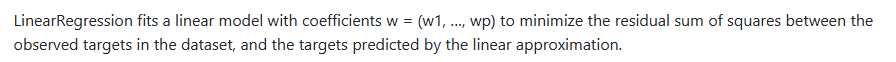

Esto nos viene a decir, que la **función de pérdida** asociada al método de mínimos cuadrados que usa *LinearRegression()* para minimizar, es precisamente el error cuadrático medio (MSE), que se define como la media de los cuadrados de las diferencias entre los valores observados y los valores predichos por el modelo:


  $$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$
  

  Donde:
- $n$ es el número de muestras en el conjunto de datos.
- $y_i$ son los valores observados.
- $\hat{y}_i$ son los valores predichos por el modelo.

\\
  
Por último respecto a la implementación, una breve explicación de la **validación cruzada**, o *cross validation*. Es una de las técnicas usadas para evaluar el rendimiento de nuestro modelo, y para asegurarnos de que la partición que hacemos entre *train* y *test* no interfiere en los resultados obtenidos. En una validación cruzada de *k-fold* o *k* particiones:
  1. Se dividen los datos de entrenamiento en *k* particiones (en nuestro caso 10)
  2. Se entrena el modelo usando *k-1* particiones
  3. Se valida el modelo en el resto de datos, quedándonos con ciertas métricas
  4. Se vuelve a (2) usando una combinación de particiones diferente

\\
 Las métricas que obtiene el *cross validation* es la media de las métricas obtenidas en cada iteración. Aunque es un método que requiere bastante capacidad de cómputo, es una buena estrategia en nuestro caso, pues solo tenemos 20 muestras en nuestro conjunto de datos. Se nos pide mostrar media y desviación típica, aunque hay una gran variedad de *scorings* o métricas para *cross_validate* en sklearn.

Todo esto en https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-evaluating-estimator-performance

\\

En cuanto al **análisis** de los resultados obtenidos podemos mencionar varias cosas:


1.   **Respondiendo a las preguntas del enunciado:** Sí, si que se observa un patrón y es que conforme añadimos grados de libertad al modelo o grados al polinomio los coeficientes se ven aumentados significativamente. Esto se debe a que con grados más altos, el modelo se vuelve más complejo, lo que puede llevar a coeficientes más grandes para compensar esta complejidad adicional y ajustar los datos de entrenamiento de manera más efectiva. Una posible solución comentada en clase es la **regularización** que consiste en hacer que los coeficientes no se vayan a valores demasiado grandes, mediante el uso de penalizaciones.

  Sí, si que se observa tanto *underfitting* como *overfitting*, para los grados 1 y 2 y para los grados 16 y 32, respectivamente. A la vista de las gráficas, considero más adecuado el grado 4, pues es el que menor error presenta fuera de los puntos de la muestra, dando a entender que es el modelo que **menos "memoriza"** los datos, y por tanto, **mejor generaliza**.

2.   **Análisis global:** Lo que se observa en este ejercicio es un claro ejemplo de *underfitting* y *overfitting*, y cómo es necesario encontrar un buen **equilibrio** entre la complejidad del modelo entrenado y el ajuste que realiza. Es fácil caer en el pensamiento de que cuantos más grados de libertad tenga, mejor será el ajuste que haga, lo cual es cierto, **pero no para la generalización del modelo**. Esto, a parte de observando las gráficas, es intuitivo de ver, mirando los errores:
  - Para grados altos (16 o 32), los errores de entrenamiento son extremadamente bajos, incluso cercanos a 0.
  - Sin embargo, si miramos los errores de test (aquí la generalización comentada) los errores se elevan muy por encima de los de grados menores.

  Esto presenta claras inconveniencias a la hora de obtener un buen modelo. Citando, no literalmente, de unas diapositivas de la Universidad de Buenos Aires:
 - Aquel modelo que **sub-ajusta** presentará robustez ante cambios de datasets, pero no predice bien.
 - Aquel modelo que **sobre-ajusta** será sensible ante cambios en los datos.

 (https://materias.df.uba.ar/lda2021c1/files/2021/04/Regresi%C3%B3n-lineal-polin%C3%B3mica-y-sobreajuste.pdf)

### <font color='blue'>Ejercicio 1.B: Clasificación en 2D (1 punto)</font>

<font color='blue'> En este ejercicio haremos algo similar a lo realizado en el anterior, pero ahora con un problema de clasificación y empleando un problema sintético en 2D. Haremos uso de dos funciones, que se incluyen a continuación:

<font color='blue'>$simula\_unif(N, dim, rango)$, que calcula una lista de $N$ vectores de dimensión $dim$. Cada vector contiene $dim$ números aleatorios uniformes en el intervalo $rango$.

<font color='blue'>$simula\_recta(intervalo)$, que simula de forma aleatoria los parámetros $v = (a, b)$ de una
recta, $y = ax + b$, dado un determinado intervalo (dentro del cual se generan dos puntos aleatorios, que se emplearán para calcular la pendiente y el término independiente de la recta).

In [ ]:
def simula_unif(N, dim, rango):
	return np.random.uniform(rango[0],rango[1],(N,dim))

In [ ]:
def simula_recta(intervalo):
    points = np.random.uniform(intervalo[0], intervalo[1], size=(2, 2))
    x1 = points[0,0]
    x2 = points[1,0]
    y1 = points[0,1]
    y2 = points[1,1]
    # y = a*x + b
    a = (y2-y1)/(x2-x1) # Cálculo de la pendiente.
    b = y1 - a*x1       # Cálculo del termino independiente.

    return a, b


<font color='blue'>Ahora, con ayuda de la función $simula\_unif()$, vamos a generar una muestra de 100 puntos 2D, en el intervalo $[-50, 50]$,  a los que vamos a añadir una etiqueta usando el signo de la función $f(x, y) = y - ax - b$ (es decir, el signo de la distancia de cada punto a la recta simulada con
$simula\_recta()$).




In [ ]:
"""
np.sign(0) da 0 (véase https://numpy.org/doc/stable/reference/generated/numpy.sign.html), lo que, en ciertas ocasiones, puede ser problemático
Por ese motivo, proporcionamos esta sencilla función que devuelve el signo del valor que se le proporciona como entrada
Si esta función se emplea con un array, se obtendrá el error "ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()"
Si quiere emplearse con arrays, bastaría vectorizarla:
		numeros = np.random.randint(-10,10,10)
		sgn = np.vectorize(signo)
		print(numeros)
		print(sgn(numeros))
"""
def signo(x):
	if x >= 0:
		return 1
	return -1

def f(x, y, a, b):
	return signo(y - a*x - b)

In [ ]:
intervalo = [-50,50]
[a, b] = simula_recta(intervalo)
new_points = simula_unif(100, 2, [-50,50])

y = []
for i in range(0,new_points.shape[0]):
    y.append(f(new_points[i][0], new_points[i][1], a, b))

y = np.array(y, np.float64)

<font color='blue'>A continuación, calculamos el error de clasificación de dicha recta ideal, y visualizamos el ajuste obtenido. Como es lógico, el error es 0% dado que lo único que estamos haciendo es mostrar los puntos etiquedatos con la recta que acabamos de crear.

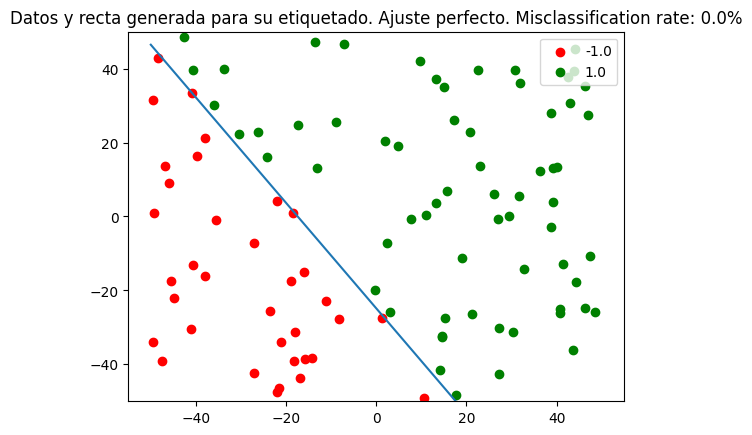

In [ ]:
errors = []
for i in range(0,new_points.shape[0]):
    errors.append(f(new_points[i,0], new_points[i,1], a, b) != y[i])
MC_rate = 100*np.sum(errors)/new_points.shape[0]

# Dibujamos una gráfica donde los puntos muestren el resultado de su etiqueta, junto con la recta usada para ello
clases = np.unique(y)
X_class = [new_points[y==c_i] for c_i in clases]
colors=['red','green']
for i in range(len(clases)):
    plt.scatter(X_class[i][:, 0], X_class[i][:, 1], color=colors[i], label = clases[i])

# plt.scatter(new_points[:,0],new_points[:,1], c=y)
plt.legend(loc='upper right')
plt.plot([intervalo[0], intervalo[1]], [a*(intervalo[0])+b, a*(intervalo[1])+b])
plt.ylim((intervalo[0], intervalo[1]))
plt.title('Datos y recta generada para su etiquetado. Ajuste perfecto. Misclassification rate: {}%'.format(MC_rate))
plt.show()

<font color='blue'>Vamos a modificar de forma aleatoria un 5\% de las etiquetas positivas y otro 5\% de las negativas. Esta modificación de etiquetas está asociada con el ruido que siempre puede estar presenta en las etiquetas (sea por problemas en la transmisión de los datos, la precisión de los sistemas de medición, la incertidumbre ligada al proceso de adquisición y anotación de los datos, etc.) En esta ocasión, a pesar de que la recta empleada es la recta ideal (es decir, la propia función empleada para generar nuestra muestra original), habrá un cierto porcentaje de error asociado.  </font>

In [ ]:
def introducir_ruido(y,porcent_ruido):
  # Identificamos las clases a partir de las etiquetas
  classes = np.unique(y)
  # Creamos una copia de las etiquetas, que será el array ruidoso que produciremos como salida
  y_noise = y.copy()
  # Ahora vamos recorriendo cada una de las clases
  for i in range(len(classes)):
    # Calculamos el número de ejemplos por clase a modificar
    numberPerClass = int(np.round(np.sum(y==classes[i])*porcent_ruido/100))
    # Recuperamos los índices de los ejemplos de cada clase y los desordenamos
    clase = np.where(y == classes[i])
    clase = np.random.permutation(clase[0])
    # Alteramos (introducimos ruido en) los índices correspondientes
    for i in clase[:numberPerClass]:
      y_noise[i] = y[i]*-1

  return y_noise

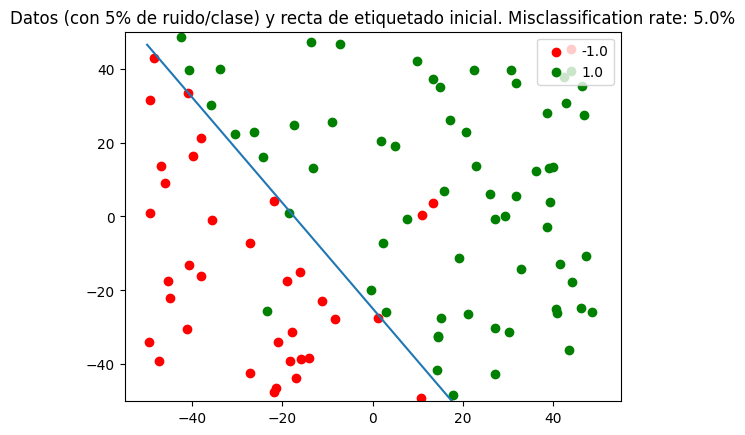

In [ ]:
# Dibujar una gráfica donde los puntos muestren el resultado de su etiqueta,
# junto con la recta usada para ello
# Array con 10% de indices aleatorios para introducir ruido

porcentaje_ruido = 5
y_noise = introducir_ruido(y,porcentaje_ruido)

errors = []
for i in range(0,new_points.shape[0]):
    errors.append(f(new_points[i,0], new_points[i,1], a, b) != y_noise[i])
MC_rate = 100*np.sum(errors)/new_points.shape[0]

plt.figure()

clases = np.unique(y_noise)
X_class = [new_points[y_noise==c_i] for c_i in clases]
colors=['red','green']
for i in range(len(clases)):
    plt.scatter(X_class[i][:, 0], X_class[i][:, 1], color=colors[i], label = clases[i])

plt.legend(loc='upper right')
# plt.scatter(new_points[:,0],new_points[:,1], c=y_noise)
plt.plot([intervalo[0], intervalo[1]], [a*(intervalo[0])+b, a*(intervalo[1])+b])
plt.ylim((intervalo[0], intervalo[1]))
plt.title('Datos (con {}% de ruido/clase) y recta de etiquetado inicial. Misclassification rate: {}%'.format(porcentaje_ruido,MC_rate))
plt.show()



<font color='blue'>Ahora queremos entrenar un $\textit{Support Vector Machine}$
 (`sklearn.svm.SVC` con kernel lineal) con estos datos y mostrar $accuracy$ y $f1$-$score$, tanto en entrenamiento como test, así como las fronteras de decisión encontradas. Una frontera de decisión ($\textit{decision boundary}$) es la superficie/hiperplano que separa el espacio de entradas de modo que, en el contexto de un problema de clasificación binaria como el que nos ocupa, el clasificador etiquete todos los puntos de un lado de la frontera como pertenecientes a una clase y todos los del otro lado como pertenecientes a la otra.

 <font color='blue'>Vamos a repetir la operación anterior con distintas transformaciones (polinómicas) de los datos de entrada (grados $1, 2, 4$ y $8$). Queremos explorar cómo cambian estas fronteras de decisión a medida que incrementamos la complejidad de los modelos empleados.

 <font color='blue'> Más concretamente, tenemos que mostrar los siguientes resultados:
* <font color='blue'>Fronteras de decisión 2D sobre datos de entrenamiento para cada uno de los 4 ajustes (e incluyendo una línea que represente la frontera ideal, es decir, la correspondiente con la recta generadora de las etiquetas y que nos gustaría aproximar). Para esta visualización pueden resultar de utilidad las siguientes funciones: `contourf`, `ListedColormap` o `DecisionBoundaryDisplay`; y el siguiente script: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html.
* <font color='blue'>Una tabla que incluya el grado de polinomio empleado (en la primera fila), el número de pesos ajustados (en la segunda fila), y los errores de entrenamiento y test con cada uno de los modelos ajustados ($accuracy$ y $f1$-$score$), en las filas tercera y cuarta de la tabla, respectivamente. De cara a evaluar el error de test, en este caso crearemos un conjunto de test diferenciado (con 100 ejemplos) siguiendo exactamente el mismo proceso empleado para el conjunto de entrenamiento. Este error de test se utilizará como estimación del error fuera de la muestra (lo que se conoce como $\textit{out-of-sample error}$).

<font color='blue'>Desde el punto de vista de entrenamiento del modelo, se recomienda emplear $SVC$ atendiendo a los siguientes aspectos: es importante escalar los datos antes de entrenar (`StandardScaler`); no nos interesa emplear regularización a la hora de entrenar el modelo (¿por qué?), motivo por el cual tendremos que escoger un valor elevado para el hiperparámetro $C$; tendremos que escoger un valor de iteraciones suficientemente alto como para permitir que el modelo entrene adecuadamente, pero suficientemente bajo como para que el entrenamiento no se eternice; y, finalmente, recordemos que el kernel a emplear es linear (¿cuál emplea SVC por defecto?).

<font color='blue'>El alumnado debe describir en detalle el trabajo realizado, las decisiones tomadas, así como las conclusiones extraídas a partir de los resultados obtenidos.

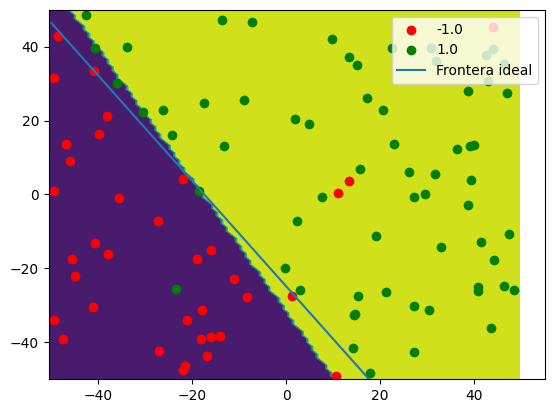

In [ ]:
# a cubrir por el alumnado
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay

#Importamos las métricas que se nos piden
from sklearn.metrics import accuracy_score, f1_score

degrees = [1,2,4,8]
n_pesos = []
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []

#Creamos conjunto de test siguiendo la hipótesis de partida:
#   Los datos de train siguen una distribución similiar a los de test

#########################################################################
new_points_test = simula_unif(100, 2, [-50,50])

y = []
for i in range(0,new_points_test.shape[0]):
    y.append(f(new_points_test[i][0], new_points_test[i][1], a, b))

y = np.array(y, np.float64)

y_noise_test = introducir_ruido(y,porcentaje_ruido)

new_points_test.reshape(-1,1)

#########################################################################

#Ahora creamos el pipeline, escalando, añadiendo grado y empleando SVM con kernel lineal
pipeline = make_pipeline(StandardScaler(),PolynomialFeatures(degrees[0]), SVC(random_state=42, C = 1000, kernel = 'linear', max_iter = 1000000))
new_points.reshape(-1,1)
clasificador = pipeline.fit(new_points, y_noise)

display = DecisionBoundaryDisplay.from_estimator(clasificador, new_points, response_method="predict")
for i in range(len(clases)):
    plt.scatter(X_class[i][:, 0], X_class[i][:, 1], color=colors[i], label = clases[i])

plt.plot([intervalo[0], intervalo[1]], [a*(intervalo[0])+b, a*(intervalo[1])+b], label = 'Frontera ideal')
plt.ylim((intervalo[0], intervalo[1]))
plt.legend(loc='upper right')
plt.show()

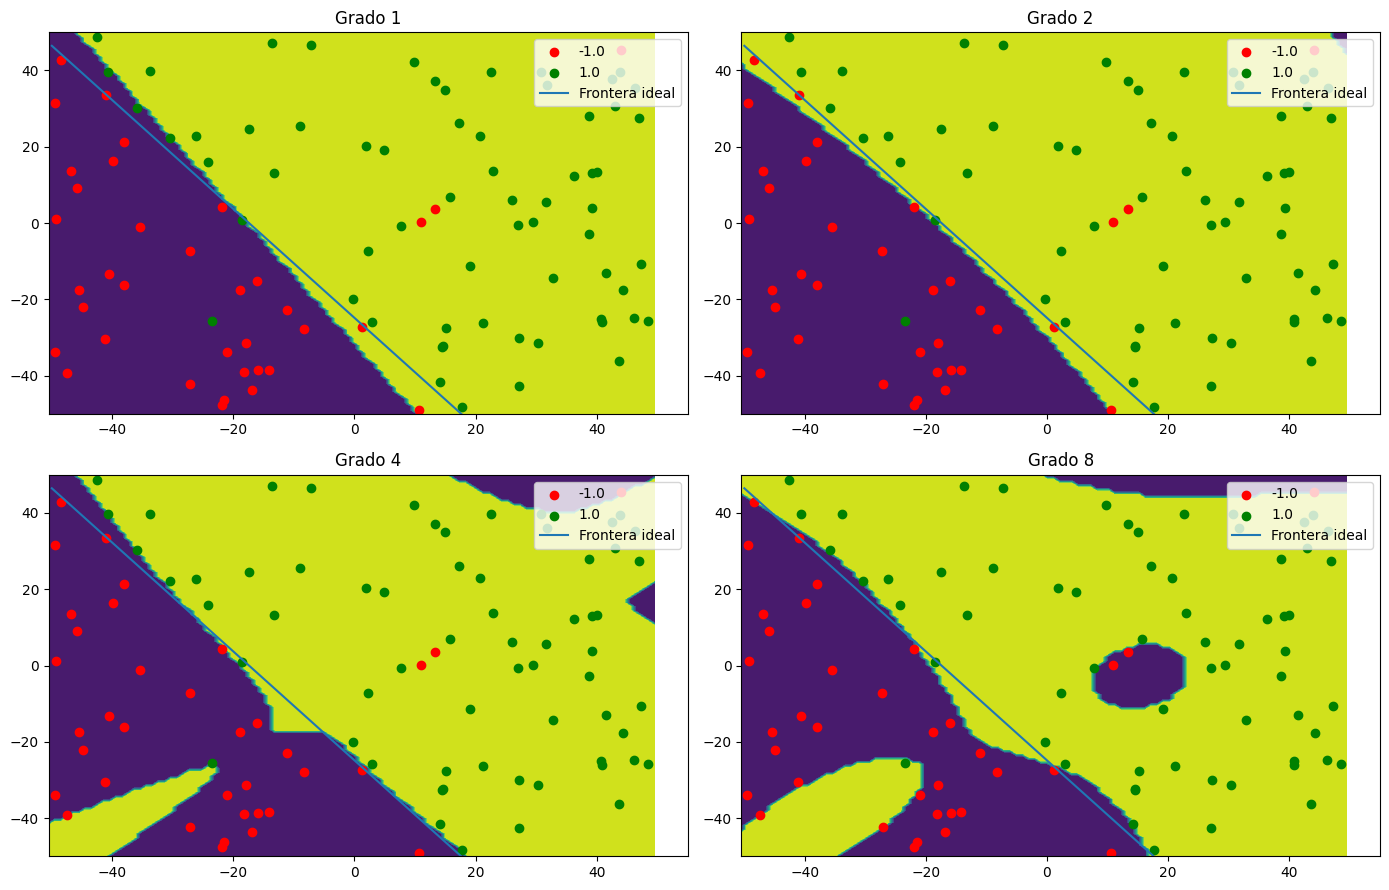

In [ ]:
#Lo hacemos para el resto de grados restantes, incluyo grado 1 para comparar
fig, ax = plt.subplots(2,2, figsize=(14, 9))

for i, degree in enumerate(degrees):

  # Calcular la posición del subplot en función del índice del grado
  fila = i // 2  # División entera para obtener la fila
  columna = i % 2  # Módulo para obtener la columna

  pipeline = make_pipeline(StandardScaler(),PolynomialFeatures(degrees[i]), SVC(random_state=42, C = 1000, kernel = 'linear', max_iter = 1000000))
  new_points.reshape(-1,1)
  clasificador = pipeline.fit(new_points, y_noise)

  y_true = y_noise
  y_pred = clasificador.predict(new_points)
  y_true_test = y_noise_test
  y_pred_test = clasificador.predict(new_points_test)

  n_pesos.append(pipeline.named_steps['svc'].coef_.size)
  accuracy_train.append(accuracy_score(y_true, y_pred))
  f1_train.append(f1_score(y_true, y_pred))
  accuracy_test.append(accuracy_score(y_true_test, y_pred_test))
  f1_test.append(f1_score(y_true_test, y_pred_test))

  DecisionBoundaryDisplay.from_estimator(clasificador, new_points, response_method="predict", ax = ax[fila,columna])

  for j in range(len(clases)):
    ax[fila,columna].scatter(X_class[j][:, 0], X_class[j][:, 1], color=colors[j], label = clases[j])

  ax[fila,columna].plot([intervalo[0], intervalo[1]], [a*(intervalo[0])+b, a*(intervalo[1])+b], label = 'Frontera ideal')
  ax[fila,columna].set_ylim((intervalo[0], intervalo[1]))
  ax[fila,columna].legend(loc='upper right')
  ax[fila, columna].set_title(f'Grado {degree}')

plt.tight_layout()
plt.show()

In [ ]:
from tabulate import tabulate

encabezado = degrees
encabezado.insert(0,"Grado del polinomio")
fila1 = n_pesos
fila1.insert(0,"Nº de pesos")
fila2 = accuracy_train
fila2.insert(0,"Accuracy en entrenamiento")
fila3 = accuracy_test
fila3.insert(0,"Accuracy en test")
fila4 = f1_train
fila4.insert(0,"f1 score en entrenamiento")
fila5 = f1_test
fila5.insert(0,"f1 score en test")
tabla=[fila1]
tabla.extend([fila2, fila3, fila4, fila5])
print(tabulate(tabla, encabezado, tablefmt="rounded_outline", numalign = "center", rowalign="center"))

╭───────────────────────────┬──────────┬──────────┬──────────┬──────────╮
│ Grado del polinomio       │    1     │    2     │    4     │    8     │
├───────────────────────────┼──────────┼──────────┼──────────┼──────────┤
│ Nº de pesos               │    3     │    6     │    15    │    45    │
│ Accuracy en entrenamiento │   0.9    │   0.92   │   0.97   │    1     │
│ Accuracy en test          │   0.91   │   0.92   │   0.84   │   0.81   │
│ f1 score en entrenamiento │ 0.921875 │ 0.940299 │ 0.976744 │    1     │
│ f1 score en test          │ 0.933333 │ 0.941176 │ 0.876923 │ 0.854962 │
╰───────────────────────────┴──────────┴──────────┴──────────┴──────────╯


#### Descripción y análisis del ejercicio 1.B
Se aborda ahora nuestro primer problema de clasificación (binaria) en el que se distinguen dos clases etiquetadas, <font color='red'>puntos rojos (-1.0) <font color='black'>y <font color='green'>puntos verdes (1.0)<font color='black'>. El objetivo es, justamente, saber clasificar cada uno de los puntos situados dentro de un intervalo dado, en nuestro caso $[-50,50]$, para ambos ejes. De hecho, se nos proporciona como crear dichos datos y separarlos (y por tanto contamos con la ***recta real de separación***) , y les introducimos como en el ejercicio anterior cierto ruido.

Nuestro objetivo será entrenar *Support Vector Machine* o *Máquina Vector Soporte*, que se encarga, en el caso de la clasificación, durante la fase de entrenamiento, de encontrar el hiperplano que mejor separa las diferentes clases de datos. Este hiperplano se encuentra de tal manera que **maximiza el margen entre las clases**. Los puntos de datos que están más cerca del hiperplano se llaman vectores de soporte.

\\

<center><img src=https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/300px-SVM_margin.png></center>

 > *Las instancias que están justo en el margen se llaman vectores soporte*

Imagen extraída de https://en.wikipedia.org/wiki/Support_vector_machine

\\
El kernel en Support Vector Machines (SVM) es una función que transforma los datos de entrada en un espacio de características de mayor dimensión. Esta transformación permite encontrar un hiperplano de separación en un espacio de características de mayor dimensión cuando en el espacio de entrada no es posible encontrar un hiperplano lineal que separe perfectamente las clases.

Respecto al kernel usado, se nos indica emplear *kernel lineal* esto es, no se realiza ninguna transformación de los datos; es decir, los datos se mantienen en el espacio de características original. El kernel lineal es útil cuando **se sospecha que los datos son linealmente separables** en el espacio de entrada, lo cual sabíamos de antemano porque conocíamos la existencia de la recta real de separación.

Por defecto, sklearn usa *Radial Basis Function* o *RBF* kernel, que es uno de los más usados debido a su parecido a la *Distribución Gaussiana*.

\\
Se trata en el ejercicio también el tema de la **regularización**, controlado por el hiperparámetro *C* en el *SVC*, en nuestro caso (*C inversamente proporcional a la fuerza de regularización*). Este proceso es un método para controlar mejor el sobreajuste de nuestro modelo. Para ello se añade una penalización a la función de pérdida, y hay tres tipos. En el caso de SVC, se usa regularización L2 (véase documentación), para la cual se añade la penalización basada en la suma del cuadrado del valor absoluto de cada uno de los pesos, o norma **$L2$**.


* Documentación que he utilizado para regularización: https://towardsdatascience.com/regularization-what-why-when-and-how-d4a329b6b27f

* Documentación ocifial de sklearm (Mathematical formulation): https://scikit-learn.org/stable/auto_examples/svm/plot_svm_scale_c.html

Se nos da una pista en el enunciado y se nos dice que no debemos de usar regularización, *i.e.* usar un valor alto de *C*. Pero esto se debe a una simple razón, el ejercicio se llama **El Problema del Sobreajuste**, es decir, queremos visualizar el sobreajuste que produce un modelo si no se aplica regularización, y se le añaden transformaciones polinómicas complejas.

De esta manera, si añadimos regularización puede ser que no lleguemos a visualizar el problema del sobreajuste.

\\
Respecto a la **estandarización** que se nos insta a hacer, generalmente suele ser un requerimiento común para la mayoría de algoritmos de aprendizaje automático, pues esto nos centra los datos ($N(0,1)$) y los escala, de hecho, en la documentación de *StandardScaler()* encontramos que algunos de los elementos que aparecen en la función objetivo o función de pérdidas asumen que los datos están centrados. Además, es una práctica común, ignorar la distribución de los datos y estandarizar de primeras.

Ver: https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling

\\
Por último, analicemos los resultados obtenidos:
 - Como ocurría en el ejercicio anterior, en general, el *accuracy* y el *f1-score* son muy buenos en entrenamiento (sobre todo para grado 8), sin embargo, en test pierden mucha potencia, llegando a tener un f1-score de 0.85.

 He aquí nuestro **sobreajuste**. Conforme tratamos de generalizar, es decir, ver que error tenemos en test para aproximar el error fuera de la muestra, nuestro modelo se comporta peor y solo "memoriza" los datos de entrenamiento.

 Y es que, de hecho, los modelos que usan transformaciones polinómicas de grados menores, generalizan mejor que los de grado 4 y 8.

 - Respecto a los pesos, vemos que son valores más altos que para el ejercicio anterior. Esto se debe a cómo opera *PolynomialFeatures* por dentro, y es que siempre trata de encontrar todas las combinaciones posibles de los pesos o características con grado menor o igual que el pasado como parámetro.

 La diferencia con el ejercicio anterior, es que antes teníamos 1 sola característica, la '$x$', con etiqueta la '$y$'. Ahora tenemos 2 características para cada ejemplo, la '$x$' y la '$y$' y como etiqueta la clase a la que pertenece. De esta manera, el número de combinaciones posibles se hace mayor y tendremos un mayor número de pesos.




---



## <font color='blue'>Ejercicio 2: PROBLEMA DE CLASIFICACIÓN (4 puntos) </font>

<font color='blue'> En este ejercicio los alumnos se enfrentarán a un problema de clasificación, que tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). Más concretamente, se enfrentarán al problema de $\textit{Optical Recognition of Handwritten Digits}$ (https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits). Este conjunto de datos contiene información sobre distintos dígitos manuscritos: cada fila contiene 64 valores enteros (en el rango $[0, 16]$) y un valor entero
(que se encuentra en el rango $[0, 9]$) que se corresponde con el dígito manuscrito a clasificar. En total hay 64 características/$features$ y 5620 ejemplos/instancias. El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):
1. <font color='blue'> Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de, al menos, 3 modelos de aprendizaje automático a emplear en la resolución del problema, de los cuales 1 por lo menos debe ser un $ensemble$.
5. Selección y estimación de valores para hiperparámetros (incluyendo el tipo de regularización a usar).
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.





In [ ]:
#Para acceder a nuestros ficheros de Google Drive
from google.colab import drive
drive.mount('/content/drive')
# La carpeta 'clasificacion' (que contiene optdigits.tes, optdigits.tra, optdigits.names)
# debe estar en vuestro Drive, dentro de la carpeta 'Colab Notebooks'

Mounted at /content/drive


In [ ]:
dataFolder = 'drive/MyDrive/Colab Notebooks/clasificacion/'

In [ ]:
###TODOS LOS IMPORTS NECESARIOS PARA ESTE EJERCICIO
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from tabulate import tabulate

In [ ]:
#Funcion para obtener las Y, o etiquetas, el ultimo elemento de la fila
def obtenerY(X):
  Y = []
  Y = X.iloc[:,-1]
  X = X.iloc[:, :-1]
  return Y,X

In [ ]:
X_train = pd.read_csv(dataFolder + 'optdigits.tra',header = None)
X_test = pd.read_csv(dataFolder + 'optdigits.tes', header = None)

Y_train, X_train = obtenerY(X_train)
Y_test, X_test = obtenerY(X_test)
#Pandas nos devuelve un Dataframe, un objeto que contiene todos los datos
X_train

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,0,6,14,7,1,0,0
1,0,0,10,16,6,0,0,0,0,7,...,3,0,0,0,10,16,15,3,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,0,9,14,0,0,0,0
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,0,1,15,2,0,0
4,0,0,5,14,4,0,0,0,0,0,...,12,0,0,0,4,12,14,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,0,0,5,13,11,2,0,0,0,2,...,10,0,0,0,8,13,15,10,1,0
3819,0,0,0,1,12,1,0,0,0,0,...,0,0,0,0,0,4,9,0,0,0
3820,0,0,3,15,0,0,0,0,0,0,...,4,0,0,0,4,14,16,9,0,0
3821,0,0,6,16,2,0,0,0,0,0,...,15,0,0,0,5,16,16,16,5,0


####2.1- Análisis del problema y análisis (exploratorio) de los datos
Se nos presenta nuestro primer problema real de clasificación, para el que usaremos un dataset de números manuscritos. Nuestro objetivo será entonces, clasificar las instancias de números escritos, dentro del rango $[0,9]$.
Para ello, el dataset nos proporciona **5620 instancias**, una cantidad grande, respecto a lo que hemos venido trabajando en la práctica. Sin embargo, como ya se comentará más tarde, es un número bastante escaso de ejemplos.

\\
La principal diferencia con la clasificación del apartado 1.B, aparte del número de instancias y parámetros, es que ahora no se trata de una clasificación binaria, si no de una **multiclase**, donde distinguiremos 10 de ellas, los números del 0 al 9, es decir, pasamos de tener 2 a tener 10 etiquetas.

\\
 Según nos dice la página oficial del dataset, se nos proporciona 5620 instancias, ya divididas en *train* y *test*, cada una de ellas con 64 *features*, números enteros en el intervalo $[0,16]$. En los archivos aparecen divididas las *samples* en líneas, donde primero aparecen las diferentes features, divididas por comas, y por último, el número manuscrito:

 $$0,1,6,15,12,1,0,0,0,7,16,...,6,14,7,1,0,0,7$$

 >*Ejemplo inventado, lo primero sería las características y el número manuscrito el 7.*

 \\
 Para comprender bien como funcionan los datos, vamos a sacar la primera fila, vamos a visualizarla y a continuación sacaremos su etiqueta:

''

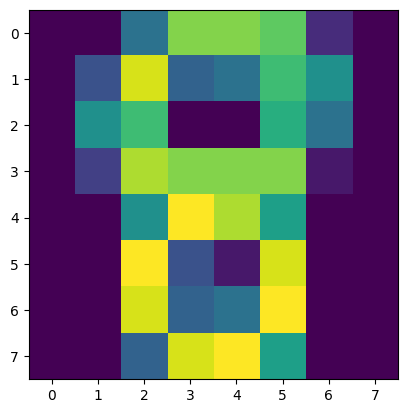

In [ ]:
#Nos quedamos con la columna 545 por ejemplo y la pasamos a una matriz de 8x8
mostrar = X_train.iloc[545,:].to_numpy().reshape(8,8)
plt.imshow(mostrar)
;

Mostramos ahora, el último elemento de la primera fila, es decir, la **etiqueta** asociada a la imagen anterior:

In [ ]:
Y_train[545]

8

Algunas de las inconveniencias que pueden presentar este tipo de problemas son:
 - **Desequilibrio en la distribución de los datos:** Puede ser que los datos que nos den para entrenar, presenten muchas instancias de los números 1 al 5 y muy pocas en cambio de 6 a 9 (en nuestro caso no es así, **histograma** a continuación de la distribución de los datos en entrenamiento).

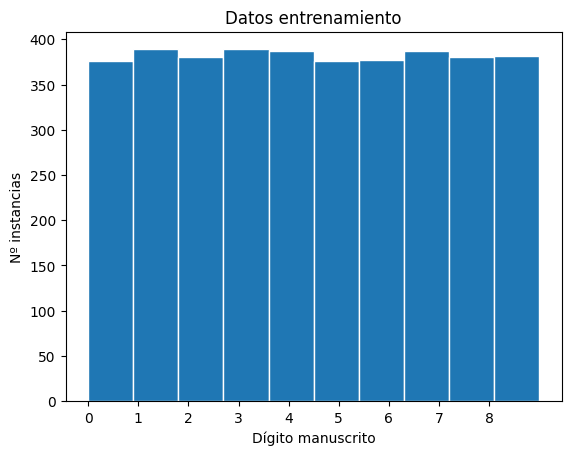

In [ ]:
fig, ax = plt.subplots()
ax.hist(Y_train, edgecolor = "white" )
ax.set_xlabel("Dígito manuscrito")
ax.set_ylabel("Nº instancias")
plt.xticks(range(0,9))
ax.set_title("Datos entrenamiento")
plt.show()

>No vemos que haya desigualdad en la frecuencia en que aparecen los datos.

\\
- **Existencia de *outliers* o valores atípicos:** Puede ser que alguna instancia o característica de la instancia contenga un valor muy dispar de todos los demás y provoque un mal entrenamiento. Es importante detectarlos y visualizarlos de manera previa al entrenamiento, para más tarde eliminarlos si se cree conveniente.

Veamos primero un resumen general de las variables continuas de nuestro problema, incluyendo media, desviación típica, cuartiles...etc.

In [ ]:
descripcion = X_train.describe() #Pandas nos ofrece esta función, donde nos devuelve métricas como la media, d.típica... por columnas
descripcion

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,3823.0,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,...,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000
mean,0.0,0.301334,5.481821,11.805912,11.451478,5.505362,1.387392,0.142297,0.002093,1.960502,...,3.743918,0.148313,0.000262,0.283024,5.855872,11.942977,11.461156,6.700497,2.105676,0.202197
std,0.0,0.866986,4.631601,4.259811,4.537556,5.613060,3.371444,1.051598,0.088572,3.052353,...,4.901657,0.767761,0.016173,0.928046,4.980012,4.334508,4.991934,5.775815,4.028266,1.150694
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,5.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,5.000000,13.000000,13.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,10.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,15.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,5.000000,15.000000,...,16.000000,12.000000,1.000000,10.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


Para hacernos una mejor idea del tipo de datos con el que estamos tratando (el *describe()* es demasiado denso y tiene 64 columnas), podríamos visualizar cada uno de los atributos, pero al tratarse de 64 de ellos es mejor recurrir a otros métodos.

Veámos por ejemplo, que características, es decir, recorremos por columnas, se desvían más de 10 unidades de la media:

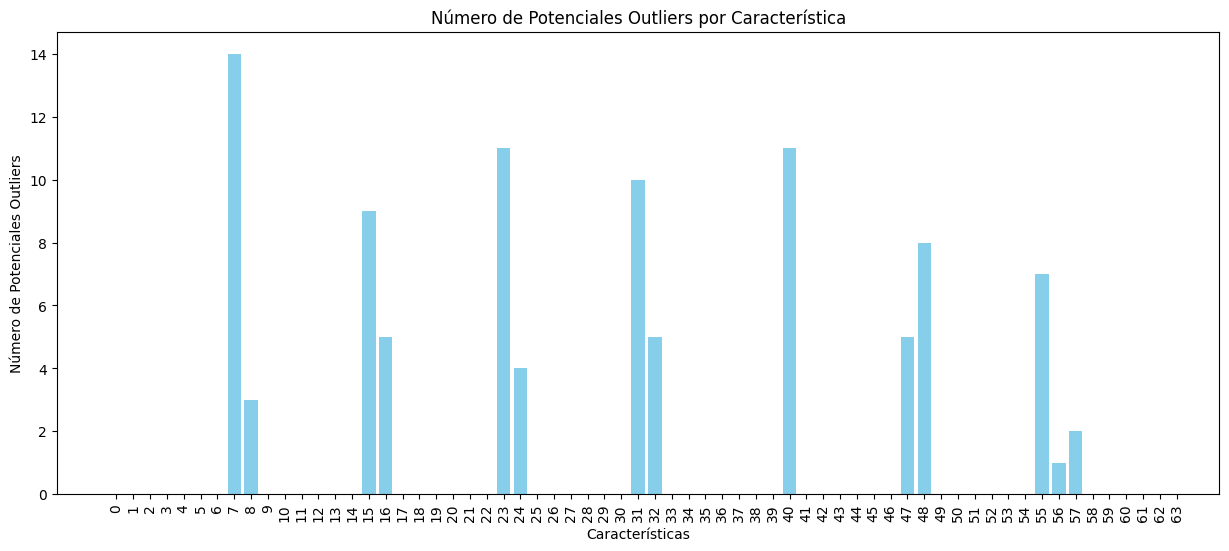

In [ ]:
desviacion = 10  # Por ejemplo, vamos a considerar como outliers aquellos valores que estén a más de 3 desviaciones de la media

# Identificar outliers potenciales
outliers = {}
for col in X_train.columns[:-1]:  # Excluimos la última columna (la columna de las etiquetas)
    mean = descripcion.loc['mean', col]
    std = descripcion.loc['std', col]
    min = mean - desviacion * std
    max = mean + desviacion * std
    outliers[col] = len(X_train[(X_train[col] < min) | (X_train[col] > max)][col].tolist())

plt.figure(figsize=(15, 6))
plt.bar(outliers.keys(), outliers.values(), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Características')
plt.ylabel('Número de Potenciales Outliers')
plt.title('Número de Potenciales Outliers por Característica')
plt.xticks(range(0,64))
plt.show()

Esto ha sido, un enfoque más bien *rudimentario* de acercamiento a detección de ouliers en las características de las instancias, y que no tiene por qué ser definitorio o demasiado representativo. Usaré ahora herramientas de sklearn para identificarlos en *sample* de manera más fiable.
Véase:
 https://scikit-learn.org/stable/modules/outlier_detection.html#novelty-and-outlier-detection

Existen dos tipos de métodos de detección:
 * **Univariate outlier detection methods:** Se centran en encontrar valores atípicos buscando en cada una de las características.
 * **Multivariate outlier detection methods:** Su objetivo son los *n-dimensional feature spaces* de manera que encuentra valores atípicos por ejemplo o instancia, en lugar de por característica.

 He escogido *Local Outlier Factor o LOF* como método. Es un método *multivariate* que usa dicho *Factor* para medir la desviación local de la densidad de cierta muestra con respecto a sus vecinos. El término **local** se refiere a que mide cómo de aislado está nuestro ejemplo con respecto a sus vecinos más cercanos. De hecho, recuerda y es muy similar al modelo ***KNN***.

 Cuando encontramos muestra con una densidad mucho menor a la de sus vecinos los consideraremos outliers. Valores de LOF menores o similares a 1 significa mayor o igual densidad que los vecinos, respectivamente. Para valores mayores que 1, es una densidad menor que la de los vecinos $\implies$ outlier.
 <center><img src=https://upload.wikimedia.org/wikipedia/commons/thumb/5/59/LOF.svg/400px-LOF.svg.png></center>

 Imagen extraida de https://es.wikipedia.org/wiki/Valor_at%C3%ADpico_local

In [ ]:
#Por defecto, n_neighbors = 20
clf = LocalOutlierFactor()
clf.fit_predict(X_train,Y_train.to_numpy().reshape(-1,1))
#Los inliers tienden a tener un valor LOF cercano a 1, los outliers, suelen ir a valores más grandes
LOF = np.abs(clf.negative_outlier_factor_)
LOF

array([1.0885597 , 1.1458606 , 0.97786315, ..., 0.99492253, 1.07024319,
       1.03517339])

In [ ]:
#Veámos cuántos valores podrían considerarse outliers según LOF
# Obteniendo los valores por encima de 1
outliers = [valor for valor in LOF if valor > 1]

print(len(outliers))
#2923 factores por encima de 1

outliers = [valor for valor in LOF if valor > 1.3]

print(len(outliers))
#49 factores por encima de 1.3

2923
49


Detectamos para ciertas características la existencia de valores que podríamos considerar **outliers** según el método empleado. No por esto vamos a eliminarlos, lo discutiremos en el apartado siguiente, preprocesado de datos.
A modo de presentación de esta discusión, ya se puede observar en la imagen anterior que el conjunto de arriba a la derecha tiene una densidad similar a la de abajo izquierda y aún asi los clasifica bien. La interpretación de los factores LOF es muy difícil y puede que incluso para un dataset un valor de 1.10 ya sea un *outlier* mientras que para otro dataset 2.5 siga siendo *inlier*.

\\


 * **Correlación de los datos:** Ahora, veamos la posible correlación entre las distintas características de nuestros datos. Para ello, vamos a usar la librería *seaborn* para dibujar un mapa de calor, que muestre la **correlación** entre nuestras distintas características. De esta manera, si encontramos que existen variables o *features* muy correlacionadas, es indicio de que debemos aplicar **reducción de dimensionalidad**, pues quedándonos con una de ellas nos vale.

 También usaremos *DataFrame.corr()* que nos devuelve la matriz de correlación de Pearson. Cuanto más claro en el mapa de calor, quiere decir que más correlacionadas están dos variables, de esta manera, la diagonal principal será siempre lo más clara posible, pues la correlación es reflexiva.

<Axes: >

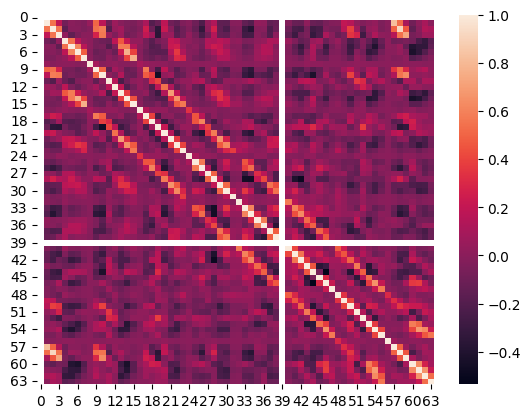

In [ ]:
sns.heatmap(X_train.corr())

In [ ]:
#El valor que nos da la fila o columna de la feature 39 es NaN
print("Desviación para la característica 39: ", descripcion.loc['std', 39])
print(X_train.corr()[39])

Desviación para la característica 39:  0.0
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
59   NaN
60   NaN
61   NaN
62   NaN
63   NaN
Name: 39, Length: 64, dtype: float64


¿Por qué nos da NaN los coeficientes de la matriz?
La fórmula del coeficiente de **correlación de Pearson** viene dada por:

$r = \frac{n\sum xy - (\sum x)(\sum y)}{\sqrt{[n \sum x^2 - (\sum x)^2][n \sum y^2 - (\sum y)^2]}} = \frac{COV(X,Y)}{Var(X) \cdot Var(Y)}
$

Si echamos un vistazo a la fórmula anterior, vemos que estamos dividiendo por la varianza, por tanto, en el caso de la característica 39, estamos dividiendo entre 0, la desviación (raíz de la varianza), es por esto que cuando imprimimos la matriz de correlación, todos los valores de la fila y columna 39 tendrán *NaN*. (También ocurre con la característica 0, pues todos sus valores son 0)

No es mayor preocupación, pues en el preprocesado de datos nos vamos a encargar de esto.


A la vista está que existen dos líneas casi paralelas a la diagonal, tanto por encima como por debajo, de *features* que están relacionadas. Además, otros puntos del mapa de calor también presentan alta claridad. Esto es indicativo y una pista de que más tarde aplicaremos la mencionada reducción de dimensionalidad.

 \\
 Respecto a un primer planteamiento de qué modelos se podrían usar, echando un primer ojo a posibles modelos de sklearn muchos de ellos ya soportan inherentemente clasificación multiclase. También se podría considerar el enfoque de cambiar la forma de representación de los datos y convertir el problema en uno de clasificación binaria, por ejemplo.

 Ver: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning


\\
 > Como última consideración antes de seguir con los siguientes pasos, creo importante destacar, que la realización de este ejercicio la he intentado hacer ***lo más secuencial posible***, aunque evidentemente, hay algo de depuración de la memoria post-entrenamiento. Esto lo he hecho para intentar recrear una situación lo más fiel posible a la realidad y no caer en casos comentados en clase como los de *data snooping*.

####2.2- Preprocesado de datos
Como aparece en las diapositivas, no hay unas reglas universales para las manipulaciones iniciales de los datos, sin embargo, sí que habiendo hecho una observación y análisis de los datos y el problema, se pueden obtener consideraciones acertadas sobre cómo "refinar" nuestro conjunto de entrenamiento.

* **Imputación de datos faltantes:** Para empezar, nos dicen que no hay "*missing values*", por lo tanto no es algo que tengamos que abordar. En caso de que los hubiese hay distitos métodos de *sklearn* que implementan dicha imputación.

* **Reducción de dimensionalidad:** En muchas ocasiones tener demasiadas características para entrenar el modelo puede resultar en un sobreajuste y en que el rendimiento se vea demasiado afectado por valores atípicos presentes en los datos. Es por esto que tratar de conseguir ***compacidad*** para nuestro modelo, manteniendo la información relevante, es en muchas ocasiones la mejor estrategia. Como se ha comentado en el análisis anterior, en vista de la relación entre las características, vamos a emplear reducción de dimensionalidad.  Como fue una de los métodos comentados y recomendados en clase, vamos a usar un ***PCA o Análisis de Componentes Principales***.
Ver https://barcelonageeks.com/reduzca-la-dimensionalidad-de-los-datos-usando-pca-python/

Siempre se recomienda que antes de aplicar PCA se **estandaricen los datos**, como en el ejercicio 1.B, con *StandardScaler*. Lo voy a hacer aunque en nuestro caso todas las características de las instancias están entre 0 y 16.


In [ ]:
escalar = StandardScaler()
X_train_sca = pd.DataFrame(escalar.fit_transform(X_train))
X_test_sca = pd.DataFrame(escalar.fit_transform(X_test))

Una vez estandarizados los datos, podemos aplicar PCA. Siguiendo la documentación oficial, con los parámetros puestos a continuación, va a escoger las componentes tal que la varianza explicada es mayor que 0.99, es decir solo pierdo (como mucho) un 1% de información:

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,0.021179,-1.506218,4.028060,2.837064,1.121506,-1.048719,0.150893,-0.236166,-1.144235,0.216062,...,0.193583,0.413726,-0.354086,-0.099895,0.014408,0.192407,0.142069,0.079098,-0.099608,-0.328052
1,-0.436318,-3.001971,6.068029,2.907716,1.439000,-0.447028,0.798956,-1.762127,-1.696441,-0.287052,...,0.479165,-0.144064,-0.070342,0.235457,-0.080707,0.044564,0.508059,0.595869,0.203963,0.451097
2,1.363008,3.160016,-0.743226,1.395725,0.314563,0.968713,-3.625171,-2.136621,-0.731816,0.292576,...,-0.433559,-0.596600,-0.682001,-0.114734,0.314444,-0.251355,0.412264,-0.539342,0.126740,0.011906
3,4.499442,0.949555,0.433865,-1.720058,-0.517172,-2.701682,1.721142,0.417025,-1.923872,1.028773,...,-0.060813,-0.208455,0.431938,-0.840509,0.590945,-0.367259,0.188341,0.320966,0.120637,0.695168
4,-1.199084,-3.264752,1.706263,1.130340,-1.262345,-0.225203,-1.368362,2.425412,0.360641,-0.039846,...,0.147666,-0.344447,0.764609,-0.213324,0.394934,-1.046653,0.084105,-0.392310,-0.106501,0.015097


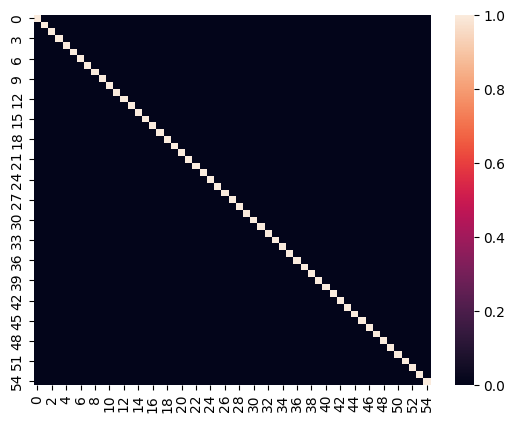

In [ ]:
pca = PCA(n_components = 0.99, svd_solver = 'full')
pca.fit(X_train_sca)
X_train_pca = pca.transform(X_train_sca)
X_test_pca = pca.transform(X_test_sca)

#Lo volvemos a convertir en Dataframe

X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)
sns.heatmap(X_train_pca.corr())
X_train_pca.head()

A la vista está que ahora nuestro conjunto de datos no presenta correlaciones y el número de *features* se ha reducido, quedandonos con las *componentes principales* (54). Es importante remarcar que *PCA* lo que hace es unir *features* que están relacionadas, de manera que por ejemplo las características 0 y 39 comentadas en el análisis del problema, al ser todo 0's, son fácilmente agregables a otras variables, de modo que nos "deshacemos" de ellas para reducir dimensionalidad sin perder información.

\\
* **Eliminación de outliers:** En el apartado anterior, discutimos la existencia de valores atípicos para nuestras características, y encontramos algunas de ellas que podrían ser potenciales *outliers*. Sin embargo, no encontramos valores muy distantes de los demás, además de que eliminarlos sería prescindir de ejemplos y por tanto de información.

  Hay que ser cautos a la hora de eliminar datos de nuestro dataset, pues no sabemos como de informativos podrían ser para nuestro entrenamiento y al fin y al cabo podría ser que estuviesemos perdiendo datos cruciales para el aprendizaje.

\\
Afortunadamente, como nuestros datos no son categóricos (tendríamos que codificarlos adecuadamente), toman datos entre 0 y 16 y además los hemos estandarizado, no tienen valores faltantes y ya hemos trabajado el tema de la dimensionalidad, no considero oportuno realizar más cambios a los datos.
Están listos para ser entrenados!

####2.3- Definición del protocolo de validación experimental
Como se nos indica, vamos a usar el conjunto de entrenamiento **"optdigits.tra"** que contiene 3823 instancias y dejaremos para test **"optdigits.tes"** que tiene las 1797 restantes.

Como protocolo vamos a usar **Hold out + CV**, esto es:
 * **Hold out**: Por defecto en este caso, pues se hace una clara separación entre *train* y *test* en los archivos proporcionados.
 * **CV**: Vamos a emplear *cross validation* sobre el conjunto de *train*. Obtendremos aquí las métricas de validación de los modelos. De esta manera, podremos comparar los modelos, en rendimiento.

 Evidentemente, al final veremos el rendimiento de cada uno en *test* pero no podemos basar nuestro análisis de ellos en estos resultados, estaríamos cayendo en *data snooping*.
 Lo que vamos a tratar de hacer con este protocolo es aproximar el error fuera de la muestra mediante el error que obtengamos en *test*, esto es
 $$E_{out} \approx E_{test}$$


 Como **métricas** de evaluación de los modelos, usaremos:
 - **Accuracy**: Representa el porcentaje total de valores correctamente clasificados por el modelo, tanto los valores positivos como negativos.
 - **Matriz de confusión:** Proporciona una visión detallada del desempeño del modelo al comparar las predicciones del modelo con los valores reales de las muestras. Es una tabla con cuatro secciones principales: verdaderos positivos (TP), falsos positivos (FP), verdaderos negativos (TN) y falsos negativos (FN). Tiene la siguiente forma:
\begin{array}{cc|c|c|}
& \text{Predicción Positiva} & \text{Predicción Negativa} \\
\hline
\text{Real Positivo} & \text{TP} & \text{FN} \\
\text{Real Negativo} & \text{FP} & \text{TN} \\
\end{array}
De esta manera, el escenario ideal que queremos es que el modelo nos muestre en la matriz $0$ FP y $0$ FN.

En el caso del problema de **clasificación multiclase**, la matriz de confusión tiene una estructura en la que las filas representan las clases verdaderas y las columnas representan las clases predichas. Cada celda de la matriz contiene el recuento de instancias en las que la clase verdadera (fila) fue clasificada como la clase predicha (columna).

\begin{array}{c|ccc}
& \text{Clase A} & \text{Clase B} & \text{Clase C} \\
\hline
\text{Clase A} & 10 & 2 & 0 \\
\text{Clase B} & 1 & 15 & 3 \\
\text{Clase C} & 0 & 1 & 12 \\
\end{array}

Por ejemplo, en la primera fila y la primera columna, se encuentran los verdaderos positivos para la clase A (10 instancias), en la segunda fila y la tercera columna se encuentran los falsos negativos de la clase B (3 instancias).


- ***Macro f1-score:*** *f1-score* es la media armónica de la *precision* y el *recall*. Maximizar esta métrica implica maximizar las dos siguientes:
  - Precision =  $\frac{TP}{TP+FP}$
  - Recall = $\frac{TP}{TP+FN}$

  $f1-score = \frac{2 \cdot Recall \cdot Precision}{Recall+Precision}$
  
  ¿Por qué usar entonces la versión macro? El *f1-score* es sensible al desbalanceo de datos en general. En nuestro caso, como hemos analizado los datos previamente y sabemos que están bien equilibrados, *macro* va a calcular la métrica para cada una de las clases. Si nuestros datos estuvieran desbalanceados y usasemos *micro*, por ejemplo, la métrica es calculada globalmente y esto podría dar lugar a resultados erróneos.

\\
**Resumen de la selección de métricas:** Es importante usar más de una métrica para la validación y la evaluación de nuestro modelo. Y es que cada métrica proporciona una ***perspectiva diferente*** sobre el rendimiento del modelo. Por ejemplo, la accuracy se centra en la proporción de predicciones correctas entre todas las predicciones realizadas, mientras que el F1-score considera tanto la *precision* como el *recall*, proporcionando así una visión más completa del equilibrio entre precisión y exhaustividad del modelo.

Además, usar la matriz de confusión proporciona una visión detallada de los resultados de la clasificación, mostrando el número de verdaderos positivos, falsos positivos... Esta información es útil para comprender cómo y dónde el modelo está cometiendo errores y puede ayudar a identificar áreas de mejora.





####2.4 - Selección de modelos
Como criterio de elección de los modelos voy a usar el más básico de todos: no he usado ninguno todavía (solo LinearRegression y SVC) y quiero ver su rendimiento para este problema concreto y así tratar de familiarizarme con ellos. Dicho esto, también tendré en consideración la manera en que se adecúen a nuestro problema de clasificación, tratando de buscar información online al respecto.

El primer modelo elegido es **KNN (K-Nearest Neighbors)**: Se trata de un modelo de aprendizaje supervisado que puede ser aplicado tanto para regresión como para clasificación. Es un algoritmo tratado en clase de teoría, fácil de implementar, rápido en tiempo de cálculo y polivalente. Es por esto que me parece un buen acercamiento al problema de clasificación que nos ocupa. De hecho, según he leído en algunos blogs, es más comúnmente usado para clasificación que para regresión.

* **¿Cómo funciona?:** Se basa en la premisa de que las observaciones más cercanas a un punto dado son las más «similares» en el conjunto de datos. Para ello, escogemos la nueva instancia a clasificar y hacemos:
 - Esogemos los k vecinos más cercanos a nuestra instancia
 - Miramos la clase de cada uno de ellos
 - Decidimos en base a esta observación cuál será la clase de la nueva instancia.


<center><img src=https://th.bing.com/th/id/OIP.9juzMdOzqDVvRZo5qx_e4QHaEV?rs=1&pid=ImgDetMain></center>

*Imagen extraída de https://www.researchgate.net/figure/Illustration-example-of-KNN-algorithm_fig1_282448172*

 - Surge la pregunta entonces de cómo interpretar K. Lo debatiremos en la elección de hiperparámetros, pero intuitivamente se entiende que cuanto mayor sea K, más exploración alrededor de la instancia vamos a hacer, y cuanto más pequeño, menos área de exloración.


\\
El segundo modelo que he elegido es **DecissionTree** que es uno de los modelos ideales para clasificación multiclase. Es una estructura de árbol en la que cada nodo interno representa una "pregunta" sobre una característica del conjunto de datos, cada rama representa la respuesta a la pregunta y cada hoja representa una etiqueta de clasificación o un valor numérico de regresión.
Una de las características de este modelo que lo hace tan usado y que me ha llamado la atención es la **interpretabilidad** y además presenta una gran robustez ante **valores atípicos o outliers**. También es eficiente en tiempo.

<center><img src=https://kanokidotorg.github.io/images/2020/05/image.png></center>


*Imagen extraída de https://kanokidotorg.github.io/2020/05/13/decision-tree-in-sklearn/*

Sin embargo, una de las desventajas que muestra este modelo es que puede llevar a un **sobreajuste** de nuestros datos de entrenamiento. Esto se debe a que cuanto más complejo sea nuestro árbol, más elementos y variables va a tener en cuenta. Esto lo comentaré en la selección de hiperparámetros, pues uno de ellos establece un criterio de parada de crecimiento del árbol.

Esto se resume en, daremos preferencia a los árboles pequeños, lo cual tendremos siempre en mente el paradigma de la Navaja de Occam.


* **¿Cómo funciona?:** El algoritmo agrupa recursivamente etiquetas similares en mismos grupos. Entonces, para cada nodo se hace una nueva partición, y se mide la calidad de la partición mediante un criterio (los distintos criterios los discutimos en selección de parámetros) que determina que grado de ***impureza*** presenta la partición. Esta es la función que vamos a intentar minimizar. Este proceso se repite hasta que alcancemos la profundidad máxima.

Todo esto en https://scikit-learn.org/stable/modules/tree.html#mathematical-formulation

\\


El último de los modelos que he elegido es el **Gradient Boosting Classifier**. Es el *ensemble* o grupo de algoritmos que voy a usar para clasificar nuestro problema. Para entender como funciona este clasificador, hemos de ir primero a cómo lo hace *AdaBoost* o *Adaptative Boost*. Este último combina el output de muchos "*weak learners*" (otros algoritmos que podrían considerarse peores) y da como resultado una suma ponderada de todos ellos. Es adaptativo en el sentido de que "*weak learners*" que se preceden van a ser conscientes de las instancias mal clasificadas anteriormente y se van a comportar acorde a ello.

  Pues bien, Gradient Boosting combina AdaBoost con la minimización de una función de error, mediante un proceso parecido al Descenso de Gradiente. La *loss* la elegimos nosotros al entrenar y puede variar bastante el resultado en función de la elegida.

 \\

  <center><img src=https://talperetz.github.io/Tal-Peretz/mastering_the_new_generation_of_gradient_boosting/photos/gbdts.png></center>

  Imagen extraída de https://talperetz.github.io/Tal-Peretz/mastering_the_new_generation_of_gradient_boosting/mastering_the_new_generation_of_gradient_boosting.html

  Como resumen, Gradient Boosting procede intentando cada uno de los estimadores mejorar a su antecesor, reduciendo iterativamente el error cometido. Tambien, como aclaración, se considera un *weak learner*, cualquier estimador que sea mejor que un simple estimador naíf. En particular, Gradient Boosting usa **Decision Trees**, como *weak learners*.

####2.5- Selección y estimación de hiperparámetros

* **KNN:** Los diferentes hiperparámetros que discutiremos para este modelo son:

  * **K (n_neighbors):** Para valores muy pequeños del parámetro, damos muy poca flexibilidad al modelo para explorar vecinos próximos y estamos muy expuestos a sobreajustar sobre los datos de entrenamiento. Sin embargo, para valores muy altos el peligro es la alta exploración, pues puede que dentro de esta exploración de vecinos, se encuentren muchas instancias de la clase que no es. Por ello, hemos de dar con un buen equilibrio de exploración, de manera que dejemos libertad al modelo pero no nos aventuremos demasiado a la hora de explorar vecinos. Esto se puede ver visualmente en la figura del apartado anterior.

  * **Métrica a distancia (metric):** Por defecto es *Minkowski*, que además con el parámetro explicado a continuación, se convierte en la distancia euclídea.

  * **Potencia (p):** Parámetro de potencia de la métrica *Minkowski*, que por defecto está a 2, lo cual la convierte en la euclídea. Es la que voy a usar, pues por la forma que tienen nuestro datos creo que es la natural a usar.

  Vamos ahora a usar grid search como hago para *Decision Tree* más adelante para ver qué valores de estos tres parámetros son mejores.

\\



In [ ]:
###Tarda 1min y 59s

params = {
    'n_neighbors':  [2, 5, 10, 15, 20], #5 es el default
    'metric':  ['minkowski', 'euclidean'],
    'p': [1,2,4,6]
}

clf = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1
)

clf.fit(X_train_pca, Y_train)
print(clf.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'metric': 'minkowski', 'n_neighbors': 5, 'p': 2}


 * **DecisionTree:**
    * **Criterio (criterion):** Es la función con la que mediremos la calidad de la mencionada partición que irá haciendo en el árbol, en concreto, estamos midiendo la impureza. Pueden ser:
      - **Gini**
      - **Entropy**
      
      Ambas formulaciones se encuentran en el enlace del apartado anterior.
    * **Splitter:** Es la estrategia con la que seleccionaremos la partición a realizar. Puede ser ***best***, escoger la mejor de ellas, o ***random***, una aleatoria.
    * **Max_depth:** Para evitar el sobreajuste discutido con anterioridad, se usa este parámetro. Decide en qué punto de la exploración del árbol se va a parar, para evitar justamente llegar a nodos hoja.

  Leyendo en https://datagy.io/sklearn-decision-tree-classifier/, descubro que *sklearn* dispone de un método de ***tuning*** de nuestros hiperparámetros, es decir, una función que es capaz de, dado un diccionario de posibles parámetros con los que puede funcionar el modelo, dar con los que mejores *accuracy* nos den.

  Para ello, internamente se va a realizar un *Cross Validation* de cv folds o particiones, siendo cv un parámetro de *GridSearchCV*. También, le tendremos que dar que estimador es para el que queremos hacer la búsqueda de los mejores parámetros, dichos parámetros, el número de trabajos a ejecutar en paralelo y la información que queremos que nos muestre.

  \\

In [ ]:
###Tarda 9s

params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'splitter': ['best', 'random']
}

clf = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1
)

clf.fit(X_train_pca, Y_train)
print(clf.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'criterion': 'entropy', 'max_depth': None, 'splitter': 'best'}


  * **Gradient Boosting Classifier:** Aunque sklearn implemente dos *gradient-boosted trees*, *HistGradientBoostingClassifier y GradientBoostingClassifier*, vamos a usar el segundo, porque en la propia documentación se indica que en problemas donde el número de instancias no es demasiado elevado es el ideal a usar. Discutamos los parámetros:

    * **n_estimators:** Es el número de *weak learners* que vamos a usar, es decir, el número de DecisionTree que vamos a entrenar. Además, el tamaño de los árboles se puede controlar via el parámetro **max_depth**.

    * **learning_rate:** Es uno de los hiperparámetros más importantes pues, tal y como discutimos en clase, puede ayudarnos a controlar el *overfiting*. Es el parámetro que acompaña a la derivada del error dentro de la muestra con respecto a cada uno de los pesos en el proceso de optimización de los mismos. Intuitivamente, representa cómo de grandes o pequeños van a ser los pasos que demos a la hora de explorar con distintos valores para los pesos. Lo que buscamos es encontrar el mejor valor para que el modelo conveja rápidamente al óptimo.
    
    * **loss:** Es la función de pérdida a usar. Siempre se recomienda usar logarítmica (la que viene por defecto) para problemas de clasificación, por lo que es la que vamos a usar aquí.

    * **max_depth:** El número máximo de profundidad que pueden alcanzar los árboles.

  Usemos ahora de nuevo grid search, para saber cuáles de todos estos funcionan mejor (hice varias ejecuciones y como siempre me marcaba como mejor **max_depth = 3**, no la tendré en cuenta en esta búsqueda). Haré grid search con los dos parámetros más importantes del ensemble:

In [ ]:
###Tarda 4min y 3s

params = {
    'n_estimators':  [15, 30], #100 es la default, en clase vimos que debían ser no muy altos si queremos ejecuciones medianamente rápidas
    'learning_rate':  [0.1, 0.3], #0.1 default
}

clf = GridSearchCV(
    estimator=GradientBoostingClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1
)

clf.fit(X_train_pca, Y_train)
print(clf.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'learning_rate': 0.3, 'n_estimators': 30}


####2.6- Entrenamiento, error, análisis y conclusiones



#####**Entrenamiento de KNN**


Entrenamos en primer lugar **KNN**, con los hiperparámetros discutidos en el apartado anterior y mostrando las métricas mencionadas tanto para train como para test:

In [ ]:
#Tarda 4s
clf1 = KNeighborsClassifier(metric= 'minkowski', n_neighbors = 5, p = 2)
clf1.fit(X_train_pca, Y_train)
score = cross_validate(clf1,X_train_pca,Y_train,scoring=['accuracy', 'f1_macro'],cv=10, return_train_score = True) #10-fold cross validation
train_accuracy = np.mean(score['train_accuracy'])
test_accuracy = np.mean(score['test_accuracy'])
train_f1 = np.mean(score['train_f1_macro'])
test_f1 = np.mean(score['test_f1_macro'])

In [ ]:
encabezado = []
encabezado.insert(0,"Métricas para KNN en entrenamiento")
fila1 = [train_accuracy]
fila1.insert(0,"Accuracy en train")
fila2 = [test_accuracy]
fila2.insert(0,"Accuracy en test")
fila3 = [train_f1]
fila3.insert(0,"f1-macro en train")
fila4 = [test_f1]
fila4.insert(0,"f1-macro en test")
tabla=[fila1]
tabla.extend([fila2, fila3, fila4])
print(tabulate(tabla, encabezado, tablefmt="rounded_outline", numalign = "center", rowalign="center"))

╭───────────────────┬──────────────────────────────────────╮
│                   │  Métricas para KNN en entrenamiento  │
├───────────────────┼──────────────────────────────────────┤
│ Accuracy en train │               0.98509                │
│ Accuracy en test  │               0.974104               │
│ f1-macro en train │               0.985137               │
│ f1-macro en test  │               0.974181               │
╰───────────────────┴──────────────────────────────────────╯


Hacemos *Cross Validation* con 10 particiones y obtenemos la tabla anterior de validación. Veamos antes de obtener la estimación de $E_{out}$, la matriz de confusión en train:

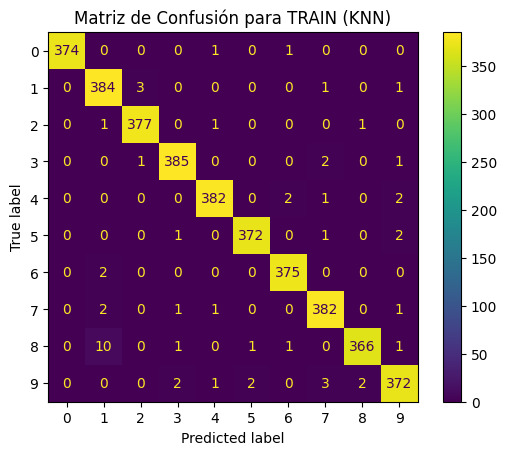

''

In [ ]:
pred = clf1.predict(X_train_pca)
cm = confusion_matrix(Y_train, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots()
disp.plot(ax=ax)
ax.set_title("Matriz de Confusión para TRAIN (KNN)")
plt.show()
;

Vemos que hay varias instancias de la clase 8 que han sido predichas como clase 1, o algún 9 como 7. Sin embargo, en *train* vemos que KNN se comporta de manera aceptable. Veamos si generaliza bien, vamos ahora con ***test*** :

In [ ]:
pred = clf1.predict(X_test_pca)
test_accuracy = accuracy_score(Y_test, pred)
test_f1 = f1_score(Y_test, pred, average = 'macro')

encabezado = []
encabezado.insert(0,"Métricas para KNN en test")
fila1 = [test_accuracy]
fila1.insert(0,"Accuracy en test")
fila2 = [test_f1]
fila2.insert(0,"f1-macro en test")
tabla=[fila1]
tabla.extend([fila2])
print(tabulate(tabla, encabezado, tablefmt="rounded_outline", numalign = "center", rowalign="center"))

╭──────────────────┬─────────────────────────────╮
│                  │  Métricas para KNN en test  │
├──────────────────┼─────────────────────────────┤
│ Accuracy en test │          0.968837           │
│ f1-macro en test │          0.968751           │
╰──────────────────┴─────────────────────────────╯


Obtenemos un accuracy y un f1-score (macro) para test de aproximadamente 0.96, es decir un error $\approx 0.03$ como aproximación de fuera de la muestra, es decir $E_{out}$. Veámos también la matriz de confusión para test:

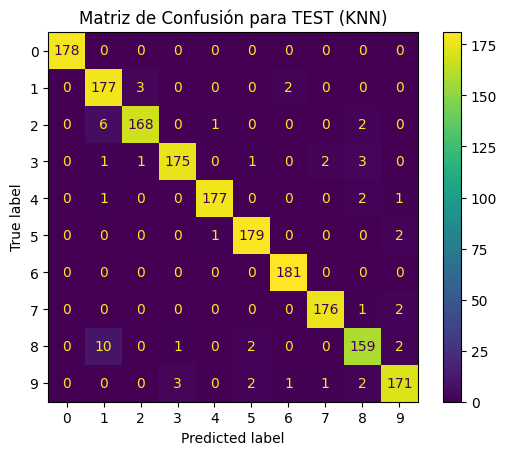

''

In [ ]:
cm = confusion_matrix(Y_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots()
disp.plot(ax=ax)
ax.set_title("Matriz de Confusión para TEST (KNN)")
plt.show()
;

\\
#####**Entrenamiento de Decision Tree Classifier**

Entrenamos ahora nuestro *DecisionTreeClassifier*, usando los mejores hiperparámetros encontrados. Este modelo es bastante rápido en tiempo, sobre todo, sin embargo, es un algoritmo que puede tender al **sobreajuste**, como ya discutimos anteriormente:

In [ ]:
###Tarda 13s en ejecutar
clf2 = DecisionTreeClassifier(max_depth=None, criterion='entropy', splitter='best')
clf2.fit(X_train_pca, Y_train)
score = cross_validate(clf2,X_train_pca,Y_train,scoring=['accuracy', 'f1_macro'],cv=10, return_train_score = True) #10-fold cross validation
train_accuracy = np.mean(score['train_accuracy'])
test_accuracy = np.mean(score['test_accuracy'])
train_f1 = np.mean(score['train_f1_macro'])
test_f1 = np.mean(score['test_f1_macro'])

In [ ]:
encabezado = []
encabezado.insert(0,"Métricas para DecisionTree en entrenamiento")
fila1 = [train_accuracy]
fila1.insert(0,"Accuracy en train")
fila2 = [test_accuracy]
fila2.insert(0,"Accuracy en test (CV)")
fila3 = [train_f1]
fila3.insert(0,"f1-macro en train")
fila4 = [test_f1]
fila4.insert(0,"f1-macro en test (CV)")
tabla=[fila1]
tabla.extend([fila2, fila3, fila4])
print(tabulate(tabla, encabezado, tablefmt="rounded_outline", numalign = "center", rowalign="center"))

╭───────────────────────┬───────────────────────────────────────────────╮
│                       │  Métricas para DecisionTree en entrenamiento  │
├───────────────────────┼───────────────────────────────────────────────┤
│ Accuracy en train     │                       1                       │
│ Accuracy en test (CV) │                   0.858494                    │
│ f1-macro en train     │                       1                       │
│ f1-macro en test (CV) │                   0.858783                    │
╰───────────────────────┴───────────────────────────────────────────────╯


Como veníamos comentando, ocurre que en train obtiene muy buenos resultados, pero no para test(CV). Veamos la matriz de confusión para train:

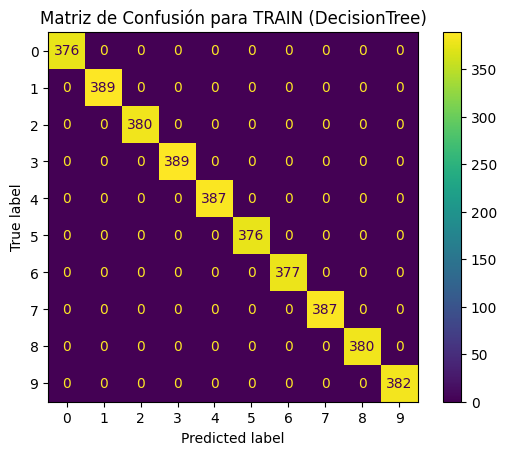

In [ ]:
pred = clf2.predict(X_train_pca)
cm = confusion_matrix(Y_train, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots()
disp.plot(ax=ax)
ax.set_title("Matriz de Confusión para TRAIN (DecisionTree)")
plt.show()

De hecho, no comete ni un solo error, hace una clasificación perfecta. Veamos su rendimiento en test:

In [ ]:
pred = clf2.predict(X_test_pca)
test_accuracy = accuracy_score(Y_test, pred)
test_f1 = f1_score(Y_test, pred, average = 'macro')

encabezado = []
encabezado.insert(0,"Métricas para DecisionTree en test")
fila1 = [test_accuracy]
fila1.insert(0,"Accuracy en test")
fila2 = [test_f1]
fila2.insert(0,"f1-macro en test")
tabla=[fila1]
tabla.extend([fila2])
print(tabulate(tabla, encabezado, tablefmt="rounded_outline", numalign = "center", rowalign="center"))

╭──────────────────┬──────────────────────────────────────╮
│                  │  Métricas para DecisionTree en test  │
├──────────────────┼──────────────────────────────────────┤
│ Accuracy en test │               0.83695                │
│ f1-macro en test │               0.836432               │
╰──────────────────┴──────────────────────────────────────╯


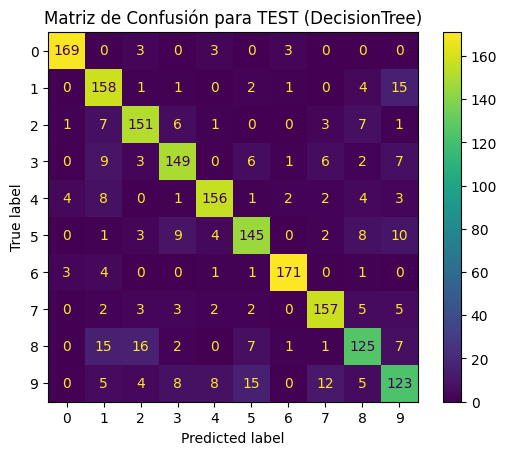

''

In [ ]:
cm = confusion_matrix(Y_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots()
disp.plot(ax=ax)
ax.set_title("Matriz de Confusión para TEST (DecisionTree)")
plt.show()
;

Podemos decir entonces que es un modelo que no ha conseguido generalizar nada bien y es bastante visible con la matriz anterior. Además, tenemos que $E_{out} \approx 0.17$. No es un resultado nada bueno.

\\
#####**Entrenamiento de Gradient Boosting Classifier**

Por último, vamos a ver cómo se comporta nuestro *ensemble*. Para empezar, con tan pocos parámetros ya es en bastante que se diferencia en tiempo de ejecución de los dos entrenamientos anteriores, lógicamente. Entrenamos y hacemos CV:

In [ ]:
###Tarda 3 min y 9s en ejecutar
from sklearn.ensemble import GradientBoostingClassifier

clf3 = GradientBoostingClassifier(learning_rate = 0.3, n_estimators = 30)
clf3.fit(X_train_pca, Y_train)
score = cross_validate(clf3,X_train_pca,Y_train,scoring=['accuracy', 'f1_macro'],cv=5, return_train_score = True) #5-fold cross validation
train_accuracy = np.mean(score['train_accuracy'])
test_accuracy = np.mean(score['test_accuracy'])
train_f1 = np.mean(score['train_f1_macro'])
test_f1 = np.mean(score['test_f1_macro'])

In [ ]:
encabezado = []
encabezado.insert(0,"Métricas para GBC en entrenamiento")
fila1 = [train_accuracy]
fila1.insert(0,"Accuracy en train")
fila2 = [test_accuracy]
fila2.insert(0,"Accuracy en test (CV)")
fila3 = [train_f1]
fila3.insert(0,"f1-macro en train")
fila4 = [test_f1]
fila4.insert(0,"f1-macro en test (CV)")
tabla=[fila1]
tabla.extend([fila2, fila3, fila4])
print(tabulate(tabla, encabezado, tablefmt="rounded_outline", numalign = "center", rowalign="center"))

╭───────────────────────┬──────────────────────────────────────╮
│                       │  Métricas para GBC en entrenamiento  │
├───────────────────────┼──────────────────────────────────────┤
│ Accuracy en train     │                  1                   │
│ Accuracy en test (CV) │               0.93696                │
│ f1-macro en train     │                  1                   │
│ f1-macro en test (CV) │               0.937317               │
╰───────────────────────┴──────────────────────────────────────╯


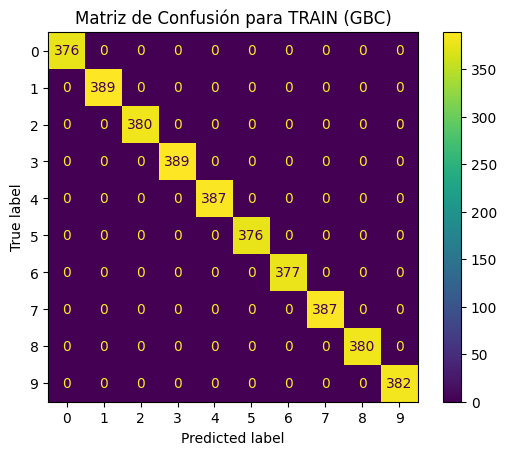

In [ ]:
pred = clf3.predict(X_train_pca)
cm = confusion_matrix(Y_train, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots()
disp.plot(ax=ax)
ax.set_title("Matriz de Confusión para TRAIN (GBC)")
plt.show()



Como pasaba para *DecisionTree*, y de hecho con sentido pues GBC usa muchos árboles de decisión, para luego unirlos, como hemos visto, el resultado en train es perfecto, error 0. Sin embargo, veamos como generaliza para test. **El hecho de que sea demasiado bueno en train no es muy buen augurio**.

In [ ]:
pred = clf3.predict(X_test_pca)
test_accuracy = accuracy_score(Y_test, pred)
test_f1 = f1_score(Y_test, pred, average = 'macro')

encabezado = []
encabezado.insert(0,"Métricas para GBC en test")
fila1 = [test_accuracy]
fila1.insert(0,"Accuracy en test")
fila2 = [test_f1]
fila2.insert(0,"f1-macro en test")
tabla=[fila1]
tabla.extend([fila2])
print(tabulate(tabla, encabezado, tablefmt="rounded_outline", numalign = "center", rowalign="center"))

╭──────────────────┬─────────────────────────────╮
│                  │  Métricas para GBC en test  │
├──────────────────┼─────────────────────────────┤
│ Accuracy en test │          0.935448           │
│ f1-macro en test │          0.935383           │
╰──────────────────┴─────────────────────────────╯


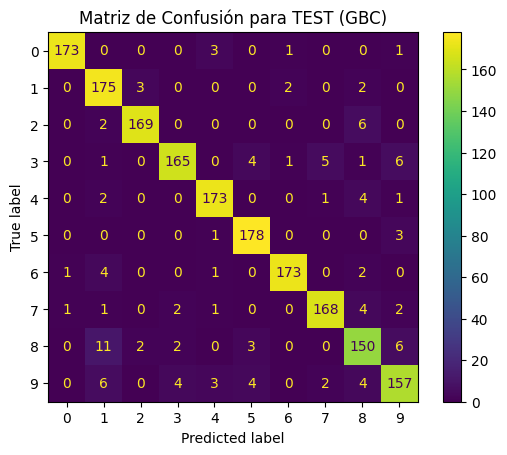

''

In [ ]:
cm = confusion_matrix(Y_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots()
disp.plot(ax=ax)
ax.set_title("Matriz de Confusión para TEST (GBC)")
plt.show()
;

Por tanto, otra vez ocurre, tenemos una matriz de confusión con ciertos errores para la clasificación de la etiqueta $8$, y varias otras malas prediccciones. Ahora, el error fuera de la muestra, $E_{out} \approx 0.07$, mucho mejor que el árbol de clasificación. Esto se debe a que GBC usa técnicas bastante más avanzadas que *DecisionTree*, como puede ser su **carácter adaptativo**, en contraste con el determinismo que presenta un árbol de decisión.

#####**Análisis y conclusiones**

En general, hemos obtenido resultados calificables de aceptables, en mi opinión. Es importante remarcar que los tres modelos entrenados pueden ser comparados, pero de manera muy delicada. **No debemos caer en comparar los errores en test**, pues estamos muy influenciados por cómo son dichos datos, no tenemos información de si todos los posibles datos fuera de la muestra son como estos. El análisis fuera de la muestra debe ser individual.

Además, las métricas empleadas son específicas, y puede ser que para estas un modelo tenga un resultado deficiente, pero si hubiesemos escogido otras métricas con las que trabajar, cabe la posibilidad de que el resultado fuese justamente el opuesto. Igualmente, el hecho de tener varias métricas y que todas ellas no sean del todo buenas ya nos pueden hacer tener una idea de cómo de bien predice nuestro modelo.

También considero importante remarcar el tema que se viene comentando del sobreajuste. Los últimos dos modelos son los que peor han conseguido generalizar y, en particular, ***DecisionTree*** ha caído en lo que temíamos, seguramente no ha sido capaz de cortar a tiempo en la expasión de nodos, y como resultado seguramente ha llegado a nodos hoja, de forma que ha "memorizado" demasiado los datos de entrenamiento.

Respecto al ***Gradient Boosting Classifier***, dado que usa internamente *DecisionTree*, también es probable que esté "memorizando" parte de los datos, pero es cierto que su componente adaptativa y la minimización del error cometido hace que dé mejores resultados que el modelo anterior. He ahí la potencia de los *ensembles*. Esto no quita que su complejidad computacional no deba tenerse en cuenta, es un factor importante pues en situaciones reales se puede requerirse cierta rapidez para entrenar.

Por último, en este caso práctico específico, queda demostrado que lo simple funciona muy bien. El algoritmo **KNN**, ha demostrado comportarse bien tanto en train como en test. Seguramente, si se tratase de un problema con una distribución más dispersa o con un número mucho mayor de instancias, el modelo sería peor elección.





---

## <font color='blue'> Ejercicio 3: PROBLEMA DE REGRESIÓN (4 puntos).

<font color='blue'> En este ejercicio los alumnos se enfrentarán a un problema de regresión, que tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). Más concretamente, se enfrentarán al problema $\textit{YearPredictionMSD}$ (https://archive.ics.uci.edu/dataset/203/yearpredictionmsd). Este conjunto de datos contiene información (características sonoras) de distintas canciones, y el objetivo es predecir el año de publicación de la canción (hay 89 posibles años a predecir). Cada fila/ejemplo contiene 90 valores reales y un valor entero, correspondiente con el año de la canción, en el rango $[1922, 2011]$). En total hay 515345 ejemplos/instancias. El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):
1. <font color='blue'> Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de, al menos, 3 modelos de aprendizaje automático a emplear en la resolución del problema, de los cuales 1 por lo menos debe ser un $ensemble$.
5. Selección y estimación de valores para hiperparámetros (incluyendo el tipo de regularización a usar).
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.


In [3]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [4]:
import numpy as np
datos = np.loadtxt("drive/MyDrive/Colab Notebooks/regresion/YearPredictionMSD.txt",delimiter=",")
datos.shape

(515345, 91)

In [5]:
###TODOS LOS IMPORTS NECESARIOS PARA ESTE EJERCICIO
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.ensemble import IsolationForest
from sklearn.utils.class_weight import compute_class_weight
#from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import ElasticNet
#!pip install imblearn
#from imblearn.over_sampling import SMOTE

####3.1- Análisis del problema y análisis (exploratorio) de los datos

Ahora, vamos con un problema bastante más complejo pero ahora de **regresión**. Es más complejo por distintos factores, entre ellos:
  1. Contamos con un número bastante alto de ejemplos, hablamos de alrededor de medio millón más de instancias que en el ejercicio anterior.
  2. En el preprocesado de datos ahora, aunque será parecido, tendremos una cantidad masiva de información y, por tanto, más difícil de manejar.
  3. Consecuentemente, ahora nuestros modelos van a tener muchísimos más datos que procesar, lo cual va a implicar dos cosas. La primera es que los tiempos de ejecución de los mismos se van a ver disparados comparando con el ejercicio de clasificación. La segunda es que ahora es probable que hagan predicciones mejores, pues la cantidad de datos es mucho más grande(tampoco tiene por qué, depende de los modelos y de cómo manejemos los datos).

  **Descripción del problema:** Se nos proporciona un dataset que contiene *features* de audio, de canciones de los años 1922 a 2011, y ya se nos da una pista de la distribución de los datos, pues nos dicen que tiene un pico en el año 2001 $\implies$ seguramente hay un desbalanceo en los ejemplos, tendremos más instancias de unos años que de otros. Tenemos el número exacto de 515345 instancias, que dividiremos en *train* y *test*, como se nos indica en la página de ***YearPredictionMSD***.

In [6]:
# Convertir los datos a un DataFrame de Pandas, para seguir con la dinámica del ejercicio anterior
df = pd.DataFrame(datos)

#Según lo descrito en la página oficial, hacemos la partición entre train y test
X_train = df.iloc[:463715]
X_test = df.iloc[463715:]

Y_train = X_train.iloc[:,0]
Y_test = X_test.iloc[:,0]

X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

valores_unico = np.unique(Y_train)
print(valores_unico)

[1922. 1924. 1925. 1926. 1927. 1928. 1929. 1930. 1931. 1932. 1933. 1934.
 1935. 1936. 1937. 1938. 1939. 1940. 1941. 1942. 1943. 1944. 1945. 1946.
 1947. 1948. 1949. 1950. 1951. 1952. 1953. 1954. 1955. 1956. 1957. 1958.
 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970.
 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982.
 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994.
 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006.
 2007. 2008. 2009. 2010. 2011.]


 >*Trabajando más tarde con los datos, nos damos cuenta de que para el año 1923 no hay ningún ejemplo. Aunque sea algo sutil, me parece importante comentarlo, pues se debe tratar, o, en su defecto, tener en cuenta manejando los datos.*

\\
  Respecto a sus instancias y respectivas características, cada fila o cada ejemplo consta de 90 valores reales y un valor entero correspondiente al año, perteneciente al intervalo de años $[1922, 2011]$. A diferencia del ejercicio anterior, no nos dan información de las características (sabíamos que iban de $0$ a $16$). Ahora lo único que sabemos es que se usó Echo Nest API, para extraer características del *timbre* de las canciones. Las primeras 12 características representan la media del timbre (*TimbreAvg*) y las 78 restantes describen la covarianza del mismo (*TimbreCovariance*). Intentemos ver que forma tienen, veamos su máximo, mínimo ...etc :

In [ ]:
descripcion = X_train.describe() #Pandas nos ofrece esta función, donde nos devuelve métricas como la media, d.típica... por columnas
descripcion

,1,2,3,4,5,6,7,8,9,10,...,81,82,83,84,85,86,87,88,89,90
count,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,...,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000
mean,43.385488,1.261091,8.650195,1.130763,-6.512725,-9.565527,-2.384609,-1.793722,3.714584,1.872495,...,15.743361,-73.067753,41.423976,37.780868,0.345259,17.599280,-26.364826,4.444985,19.739307,1.323326
std,6.079139,51.613473,35.264750,16.334672,22.855820,12.836758,14.580245,7.961876,10.579241,6.522868,...,32.086356,175.376872,121.794610,94.874474,16.153797,114.336522,174.187892,13.320996,184.843503,22.045404
min,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,-41.631660,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-318.223330
25%,39.957540,-26.153810,-11.441920,-8.515155,-20.636960,-18.468705,-10.776340,-6.461400,-2.303600,-2.448450,...,-1.798085,-139.062035,-20.918635,-4.711470,-6.758160,-31.563615,-101.396245,-2.572830,-59.598030,-8.813335
50%,44.262570,8.371550,10.470520,-0.691610,-5.992740,-11.208850,-2.047850,-1.735440,3.816840,1.775310,...,9.161360,-52.878010,28.709870,33.494550,0.828350,15.554490,-21.123570,3.111120,7.586950,0.052840
75%,47.833650,36.143780,29.741165,8.756995,7.749590,-2.422590,6.515710,2.905130,9.950960,6.128885,...,26.248290,13.620660,89.419995,77.674700,8.495715,67.743725,52.299850,9.948955,86.203115,9.670740
max,61.970140,384.065730,322.851430,289.527430,262.068870,119.815590,172.402680,105.210280,146.297950,60.345350,...,840.973380,4469.454870,3210.701700,1672.647100,260.544900,3662.065650,2833.608950,463.419500,7393.398440,600.766240


Vemos que las características son valores reales, tanto positivos como negativos, que pueden llegar a ser muy altos en valor absoluto (basta ver el valor de los máximos y mínimos). También presentan desviaciones bastante altas.
Concentrémonos ahora en algo que ya intuiamos antes, la distribución desbalanceada de las distintas clases:

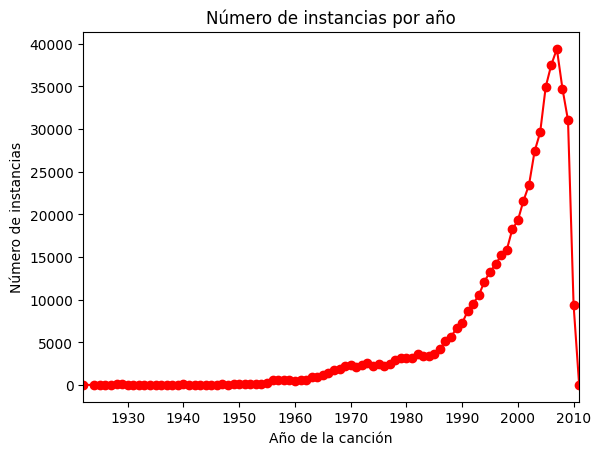

In [ ]:
conteo_por_año = df[0].value_counts().sort_index()

fig, ax = plt.subplots()
ax.plot(conteo_por_año.index, conteo_por_año.values, marker='o', linestyle='-', color='red')
ax.set_xlabel("Año de la canción")
ax.set_ylabel("Número de instancias")
ax.set_title("Número de instancias por año")
ax.set_xlim(1922,2011)

plt.show()

Es claro que se tienen muchísimas más instancias o ejemplos de los años más recientes, veamos con cuántas contamos, más o menos, para los años $[1922, 1960]$. Hagamos "zoom" sobre estos datos.

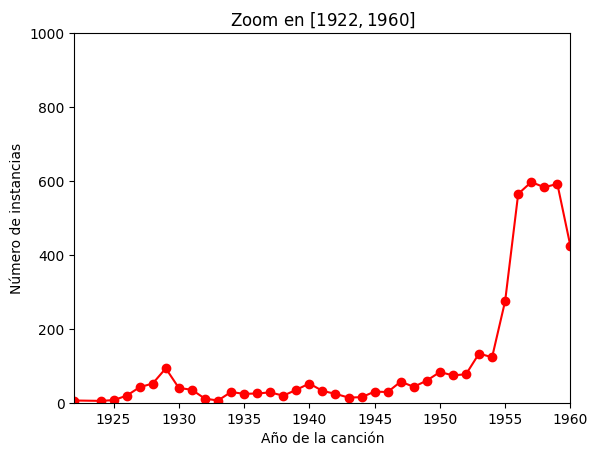

In [ ]:
conteo_por_año = df[0].value_counts().sort_index()

fig, ax = plt.subplots()
ax.plot(conteo_por_año.index, conteo_por_año.values, marker='o', linestyle='-', color='red')
ax.set_xlabel("Año de la canción")
ax.set_ylabel("Número de instancias")
ax.set_title("Zoom en $[1922, 1960]$")
ax.set_xlim(1922, 1960)
ax.set_ylim(0, 1000)

plt.show()

Vemos que alrededor de los años seleccionados tenemos entre 50 - 200 instancias, con pico en los años $[1956,1959]$, con hasta 600 instancias. Sin embargo, si los comparamos con los años 2000, la diferencia es abismal, pues tenemos cerca de 40000 instancias. Todo esto se tendrá que tener en cuenta en el **preprocesado de datos**.


\\
Cabe plantearse también entonces si estos datos pueden ser ***outliers*** en nuestro dataset. Como antes se usó *LOF* para detección de outliers, vamos a usar ahora ***Isolation Forest*** :
  
Es un algoritmo de detección de anomalías que trata de aislar ejemplos que puedan ser outliers, y es *multivariate* pues se centra en abordar cada uno de los ejemplos de nuestro problema, en lugar de las características o *features*. Tiene un funcionamiento muy parecido a *DecissionTree*, pues hace un particionamiento recursivo aleatorio entre el máximo y el mínimo de los valores de una característica también aleatoria y se cuenta la profundidad hasta llegar a cada valor aislado.
  
  Como resumen, las instancias anómalas son más propensas a quedar aisladas en los nodos más superficiales del árbol debido a su naturaleza única y diferente. En contraste, las instancias normales necesitan más divisiones para ser aisladas. Aquellos valores a los que se llegue muy rápido, es decir, con un **tamaño de profundidad bajo**, se podrán considerar **posibles anomalías**. Como ventajas, es lineal en tiempo, requiere muy poca memoria y se puede usar en problemas de alta dimensionalidad.

  El algoritmo devuelve el *anomaly score* para cada una de las instancias. Valores muy cercanos a $-1$ serán considerados *outliers* y los *inliers* cercanos a $0$.

In [ ]:
#Tarda 5s
#Cada iteración cambia, pues la partición que hace tiene un componente estocástico
#Tras varias iteraciones, el valor siempre queda en torno al 5%
Iforest = IsolationForest()
Iforest.fit(X_train)

y_pred = Iforest.predict(X_train)
y_pred_adjusted = [1 if x == -1 else 0 for x in y_pred]
print(sum(y_pred_adjusted))

porcentaje = sum(y_pred_adjusted) / 463715 * 100
print(f"{porcentaje:.2f}%")

22531
4.86%


Aparentemente, un 5% de los datos podrían ser anomalías, lo discutiremos más tarde, pero no por ello los vamos a eliminar. A modo de presentación, lo más probable es que esté detectando como *outliers* aquellos ejemplos que son de las clases con menos ejemplos, pues son más sencillos de aislar.

\\
Ocupémonos ahora de la **correlación de los datos**, como hicimos en el ejercicio anterior, con objeto de tratar de visualizar las posibles relaciones entre características de las instancias.

<Axes: >

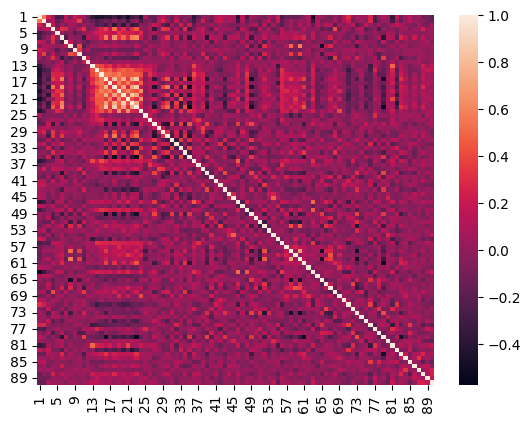

In [ ]:
#Tarda 25s
sns.heatmap(X_train.corr())

Aunque esta matriz es bastante poco informativa, observamos que la correlación de las distintas características es levemente elevada, siendo bastante más en las características $[13,25]$ aprox. entre ellas (posible indicio de tener que aplicar PCA). Vamos a hacer un acercamiento diferente ahora. Veamos la correlación que tienen las características con respecto al año de *release* :

<ipython-input-14-ae6295be4223>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.index[1:-1], y=corr.iloc[0, 1:-1], palette='viridis').set_title('Correlacion con cada año')


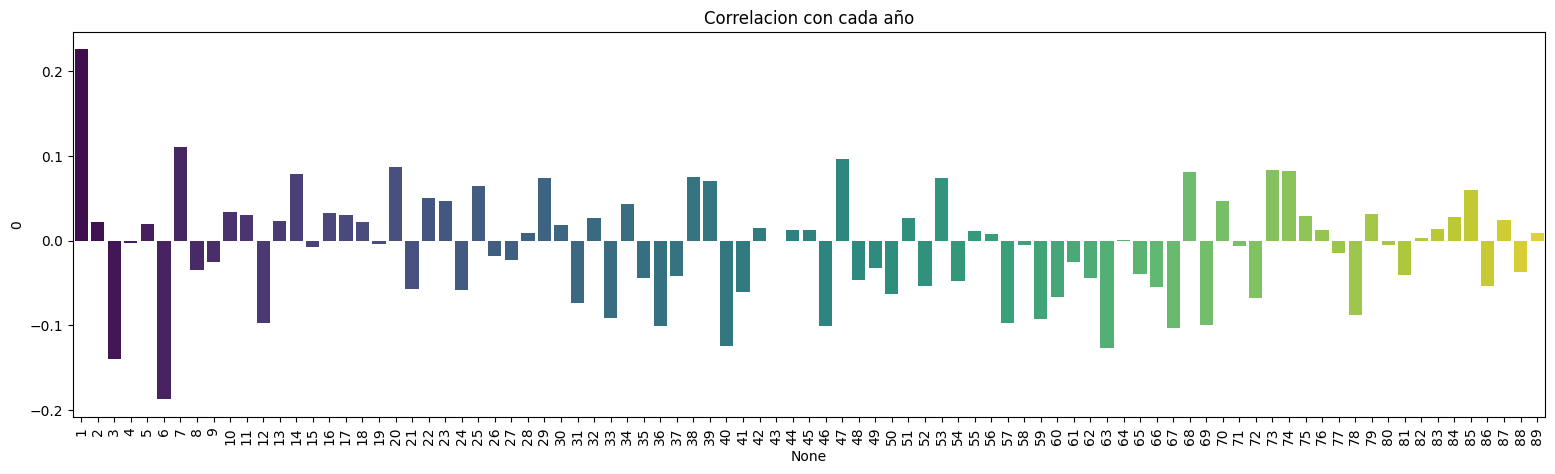

In [ ]:
corr = df.iloc[:,:].corr()
fig, ax = plt.subplots(figsize=(19,5))
sns.barplot(x=corr.index[1:-1], y=corr.iloc[0, 1:-1], palette='viridis').set_title('Correlacion con cada año')
plt.xticks(rotation=90)
plt.show();

Si nos fijamos en la **característica 1**, vemos que tiene una alta correlación con el año de salida de la canción. Esto es, esta *feature* tendrá unos valores más altos conforme nos acerquemos a años más recientes. Sin embargo, la **característica 6** tiene una correlación negativa con los años, es decir, será más grande para años más tempranos.

####3.2- Preprocesado de datos

Lo primero que vamos a tratar es la normalización de nuestros datos, pues cuando visualizamos las distintas variables continuas vimos que eran características con **valores muy dispersos y poco ordenados**. Vamos a usar *StandardScaler* de sklearn:


$$
z = (x - u) / s
$$

Donde $u$ es la media y $s$ la desviación típica de cada una de las características.



In [7]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Lo volvemos a pasar a DataFrame
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

Acto seguido, debido al alto número de características con las que contamos vamos aplicar PCA como en el ejercicio anterior. Pero antes, vamos a usar un **Scree Plot**:

Un Scree plot es una gráfica que muestra los valores propios (eigenvalues) de los componentes principales en PCA. Los valores propios representan la **cantidad de varianza explicada** por cada componente principal.

En un Scree plot, los valores propios se representan en el eje y, mientras que el número de componente (o la variable que representa la dimensión) se representa en el eje x. La gráfica se ve como una curva que desciende rápidamente al principio y luego se aplana. El punto en el que la curva comienza a aplanarse se conoce como **"el codo"** y representa el número de componentes principales que explican la mayor parte de la varianza en los datos.

Son útiles para determinar cuántos componentes principales retener en un análisis de componentes principales. Vamos a ver que forma tiene:


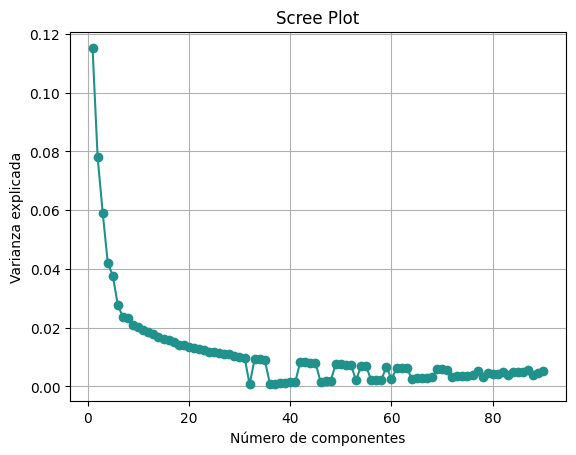

In [ ]:
#Obtenemos los valores propios
eigenvalues = np.linalg.eigvals(X_train.corr())
explained_variance = eigenvalues / np.sum(eigenvalues)

# Graficar el Scree plot
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-',  color=plt.cm.viridis(0.5))
plt.title('Scree Plot')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada')
plt.grid(True)
plt.show()

Otra forma de hacer lo mismo es calcular la varianza explicada **acumulada** y proceder al análisis de la curva de una forma muy similar:

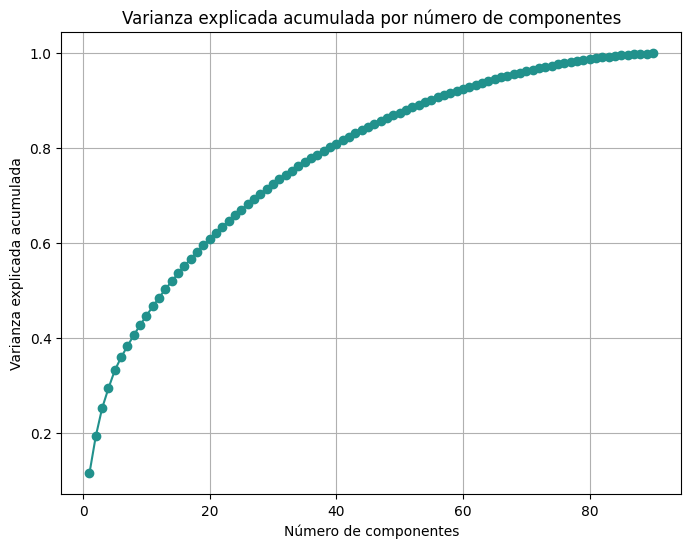

In [ ]:
pca = PCA() #Por defecto n_components = None, es decir escoge min(n_features, n_samples) -1, en este caso 89
pca.fit(X_train)

# Calcular la varianza explicada acumulada
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Graficar la varianza explicada acumulada en función del número de componentes
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='-',  color=plt.cm.viridis(0.5))
plt.title('Varianza explicada acumulada por número de componentes')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

Vamos a escoger como **codo** el 60, pues vemos que con las primeras 60, aplicando el método del codo (Elbow method). Apliquemos PCA con este número de componentes:

In [ ]:
pca = PCA(n_components=60).fit(X_train)
X_train_pca1 = pca.transform(X_train)

Veamos si la elección ha sido buena, podemos probar a usar el parámetro *n_components = 0.95*   y  *svd_solver = 'full'*. Este es otro enfoque u otro **método**, es el de escoger un mínimo de varianza explicada que sea explicada por los componentes principales:
 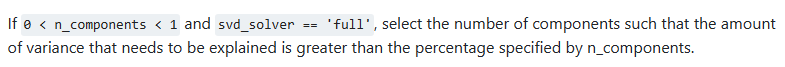

In [8]:
pca = PCA(n_components = 0.95, svd_solver = 'full').fit(X_train)
X_train_pca2 = pca.transform(X_train)
X_test_pca2 = pca.transform(X_test)

In [ ]:
X_train_pca2.shape

(463715, 67)

Obtenemos 67 componentes, cerca de la elección que habíamos hecho previamente. Por comodidad, vamos a quedarnos con este último PCA. Veamos como queda ahora nuestro **Scree Plot** una vez aplicado PCA, para ver qué componentes explican más y cuáles menos:

<ipython-input-21-f9b043fb186a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ind, y=pca.explained_variance_ratio_, palette='viridis')


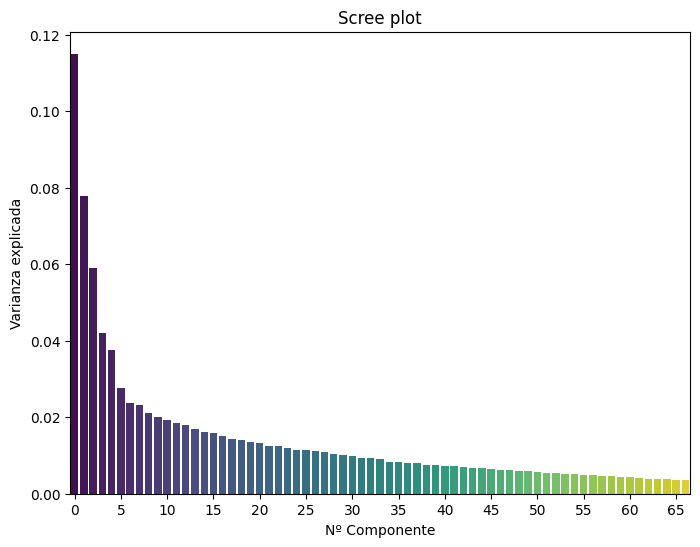

''

In [ ]:
ind = np.arange(0, 67)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.barplot(x=ind, y=pca.explained_variance_ratio_, palette='viridis')
ax.set_title('Scree plot')
ax.set_xlabel('Nº Componente')
ax.set_ylabel('Varianza explicada')
xticks_values = np.arange(0, 67, 5)  # Valores en el eje x de 0 a 67, de 5 en 5
ax.set_xticks(xticks_values)
ax.set_xticklabels(xticks_values)
plt.show()
;

Vamos a tratar ahora el problema de **desbalanceo de datos**. Como primer enfoque nos planteamos hacer **oversampling**, es decir, se aumenta artificialmente el número de instancias de las clases minoritarias para equilibrar la distribución de clases. Un algoritmo comúnmente utilizado para este propósito es el SMOTE (Synthetic Minority Over-sampling Technique), que genera instancias sintéticas mediante interpolación entre instancias de la clase minoritaria.

\\
Sin embargo, ampliar el dataset que tenemos, que ya era suficientemente grande, puede provocar problemas de ineficiencia en tiempo a la hora de entrenar. Es por esto que para tratar el desbalanceo vamos a tratar de combinar dos enfoques:
 - **Ponderación de muestras:** Asignar pesos más altos a las muestras de la clase minoritaria para que el modelo las tenga en cuenta de manera más significativa durante el entrenamiento.
 - ***Regularización:*** Ya que sí que estamos teniendo en cuenta con los pesos calculados en la ponderación, ahora nos aseguramos de que no cometemos sobreajuste para las clases minoritarias (y también las más frecuentes).

 Considero que esta combinación puede ayudar a mejorar el rendimiento del modelo al abordar tanto el desbalanceo de clases como el riesgo de sobreajuste. Veamos más tarde si es así.

\\
Vamos a hacer ahora la asignación de pesos correspondiente a los distintos años o clases. Para ello, vamos a usar una vez más funcionalidades de *sklearn*. Esta nos ofrece la función ***compute_class_weight()***, que directamente nos va a estimar los pesos para conjuntos de datos desbalanceados:

Ver documentación aquí: https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html#sklearn-utils-class-weight-compute-class-weight

In [9]:
clases_unicas = sorted(Y_train.unique())
pesos_clase = compute_class_weight(class_weight="balanced", classes=np.unique(Y_train), y=Y_train)

pesos_clase_dict = dict(zip(clases_unicas, pesos_clase))

pesos_muestras = Y_train.map(pesos_clase_dict)

Estos pesos serán tenidos en cuenta en el entrenamiento, más concretamente en el método *fit()* que nos proporcionan los modelos.

\\
De igual manera que para el problema 2, ahora no tenemos *missing values*, y los datos que tenemos no requieren ningún tipo de codificación, pues tratamos con valores enteros y reales. Ahora toca entrenar :)

####3.3- Definición del protocolo de validación experimental

De la misma manera que en el ejercicio 2 nos daban los archivos de entrenamiento y test por separado, en este problema nos dan el número de instancias que pertenecen a cada partición, de manera que somos nosotros los que tenemos que separar los datos, a mano. Dicho esto, el protocolo y la manera de trabajar va a ser la misma, es decir, **Hold out + CV**.

\\
Inherentemente a la forma en que se nos proporcionan los datos, estamos haciendo Hold out y además, vamos a hacer validación usando *Cross Validation*. De nuevo tendremos:
 $$E_{out} \approx E_{test}$$

\\
La diferencia ahora viene con las **métricas**.

**1. Error cuadrático medio (MSE):** Es el más ampliamente usado para problemas de regresión y calcula el promedio de los cuadrados de las diferencias entre las predicciones del modelo y los valores reales.

**2. Error absoluto medio (MAE):** Calcula el promedio de las diferencias absolutas entre las predicciones del modelo y los valores reales. El MAE proporciona una medida de la magnitud promedio de los errores del modelo y es menos sensible a valores atípicos que el MSE.

**3. Coeficiente de determinación ($R^2$):** Mide la proporción de la varianza en la variable dependiente que es explicada por el modelo. Un valor de $R^2$ cercano a 1 indica que el modelo explica bien la variabilidad de los datos, mientras que un valor cercano a 0 indica que el modelo no explica nada de la variabilidad.

####3.4- Selección de modelos
Se presentan ahora los disintos modelos elegidos para el entrenamiento de nuestros modelos:

* **SVR o *Support Vector Regression* :** Funciona de manera muy parecida que *Support Vector Machine* para problemas de clasificación, solo que para regresión trata de encontrar el margen o tubo alrededor de nuestros datos más estrecho posible, mientras intenta minimizar el error de predicción.

\\
<center><img src=https://media.springernature.com/lw685/springer-static/image/chp%3A10.1007%2F978-1-4302-5990-9_4/MediaObjects/978-1-4302-5990-9_4_Fig1_HTML.gif?as=webp></center>

Imagen extraída de https://link.springer.com/chapter/10.1007/978-1-4302-5990-9_4

\\
Es decir, se formula el problema anterior como uno de optimización. La función de pérdida que usa penaliza los errores fuera del margen de tolerancia, mientras que no penaliza los errores dentro del margen. Al igual que para *SVC* se pueden usar distintos *kernels*. *SVR* es bastante poco eficiente computacionalmente y tiene unos tiempos bastante altos de entrenamiento.

**(Debido a tiempos altísimos de ejecución y falta de tiempo de entrenamiento he optado por elegir otro modelo que sea más rápido).**

\\
* ***Ridge Regressor* :** Se trata de una técnica de regresión que es una extensión de la regresión lineal ordinaria. La diferencia principal entre la regresión lineal ordinaria (usada en el ejercicio 1.A) y la regresión de Ridge radica en cómo se trata la regularización.

  El Ridge Regression agrega una penalización L2 (norma euclidiana al cuadrado) a la función de pérdida de la regresión lineal ordinaria. De esta manera los coeficientes grandes se penalizan más fuertemente, lo que conduce a un modelo más suave y menos propenso al sobreajuste.

  La panalización L2 viene dada por:

  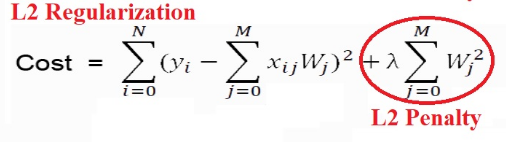

  Imagen extraída de https://thewindowsupdate.com/2020/08/27/introduction-to-supervised-machine-learning/

\\
  Aún siendo un modelo bastante simple, algunas de las ventajas que tiene *Ridge* es que controla bastante bien el sobreajuste de los datos y es poco sensible ante la posible colinealidad de los datos.


* ***Elastic Net:*** Se trata de un modelo de regresión que combina las penalizaciones $L1$ (Lasso) y $L2$ (Ridge) en una sola función de regularización, de ahí el término de *elastic*. Esto permite controlar tanto la selección de características como la estabilidad del modelo simultáneamente. Como ya hemos explicado $L2$, veámos la $L1$:

$$\text{ElasticNetMSE} = \text{MSE}(y, y_{\text{pred}}) + \alpha \cdot (1 - \text{L1Ratio}) \sum_{i=1}^m |\theta_i| + \alpha \cdot \text{L1Ratio} \sum_{i=1}^m |\theta_i|$$
  
  La penalización $L1$ es proporcional a la suma de los valores absolutos de los coeficientes del modelo, es decir, la norma de los coeficientes. Usar las dos penalizaciones tiene ventajas

  - **La penalización $L1$ (Lasso)**  tiene la propiedad de realizar selección de características, lo que significa que puede forzar algunos coeficientes del modelo a cero. Esto puede ser útil para la selección automática de características y la construcción de modelos más simples y más interpretables.
  - **La penalización $L2$ (Ridge)** ayuda a estabilizar los coeficientes del modelo al restringir su magnitud. Esto puede ayudar a prevenir el sobreajuste y mejorar la generalización del modelo, especialmente en presencia de multicolinealidad entre las características.

Todo esto en https://machinelearningcompass.com/machine_learning_models/elastic_net_regression/

\\
* **Random Forest :** Se construye un conjunto (ensemble) de árboles de decisión durante el entrenamiento. Cada árbol se entrena en un subconjunto aleatorio del conjunto de datos, y las características también se seleccionan aleatoriamente en cada división del árbol:

  - En cada árbol, se realiza un muestreo aleatorio con reemplazo (llamado bootsrap) de las muestras del conjunto de datos, lo que significa que algunas muestras pueden aparecer varias veces y otras no aparecer en absoluto. Además, para cada división en un árbol, se selecciona un subconjunto aleatorio de características para considerar.

   

<center><img src=https://favtutor.com/resources/images/uploads/mceu_18984255451608651954125.jpg></center>

\\
  Los random forest suelen tener muchos árboles y suele ser un parámetro que por lo general, se ajusta mediante validación cruzada. También el resto de hiperparámetros (discutido más abajo) deben ser elegidos cuidadosamente, pues puede generar un modelo propenso al sobreajuste, como ocurría con *DecisionTree*.

####3.5- Selección y estimación de hiperparámetros

Hagamos un examen y análisis de los hiperparámetros más importantes para cada uno de los modelos elegidos:

1. **Elastic Net:** Discutamos los parámetros que se van a usar:
 - **alpha**: Especifica la constante por la que se multiplica $L2$
 - **l1_ratio**: Es el parámetro que hace el "*mix* " entre $L1$ y $L2$. Un valor igual a 0 equivale a $L2$ y si es igual a 1 es $L1$.

Hagamos grid_search de los mejores parámetros de entre estos dos:

In [ ]:
#Tarda 50s
params = {
    'alpha': [0.5, 1.0, 1.5],
    'l1_ratio': [0.1, 0.5, 0.9]
}

clf = GridSearchCV(
    estimator=ElasticNet(),
    param_grid=params,
    scoring = 'neg_mean_squared_error',
    cv=3,
    n_jobs=5,
    verbose=10
)

clf.fit(X_train_pca2, Y_train, sample_weight=pesos_muestras.loc[X_train.index])

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=ElasticNet(), n_jobs=5,
             param_grid={'alpha': [0.5, 1.0, 1.5], 'l1_ratio': [0.1, 0.5, 0.9]},
             scoring='neg_mean_squared_error', verbose=10)

In [ ]:
print(clf.best_params_)

{'alpha': 0.5, 'l1_ratio': 0.9}


2. **Regresión Ridge**:
 - **alpha:** Es el más importante del modelo pues mide la constante por la que se multiplica la penalización $L2$.
 - **solver:** Refiere al algoritmo utilizado para calcular los coeficientes del modelo. Este parámetro especifica cómo se resuelve el problema de optimización asociado con la regresión Ridge. Vamos a probar:
    * *svd* : Utiliza la descomposición en valores singulares (SVD) para calcular los coeficientes del modelo.
    * *lsqr* : Este solver utiliza el método de mínimos cuadrados (LSQR) para resolver el problema de optimización.

In [ ]:
#Tarda 1m 11s
params = {
    'alpha': [0,0.5, 1,5],
    'solver': ['svd', 'lsqr']
}

import sys
sys.stderr = sys.stdout

clf = GridSearchCV(
    estimator=Ridge(),
    param_grid=params,
    scoring = 'neg_mean_squared_error',
    cv=3,
    n_jobs=5,
    verbose=10
)

clf.fit(X_train_pca2, Y_train, sample_weight=pesos_muestras.loc[X_train.index])

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=Ridge(), n_jobs=5,
             param_grid={'alpha': [0, 0.5, 1, 5], 'solver': ['svd', 'lsqr']},
             scoring='neg_mean_squared_error', verbose=10)

In [ ]:
print(clf.best_params_)

{'alpha': 0, 'solver': 'lsqr'}


3. **Random Forest:** Discutamos los parámetros más importantes y decidamos a partir de ellos:
  * **n_estimators:** El número de árboles a usar en el "bosque". Por defecto, 100.
  * **criterion:** El criterio  utilizado para medir la calidad de una división en un árbol de decisión durante la construcción del bosque aleatorio. Por defecto, se usa MSE.
  * **max_depth:** Controla la profundidad máxima de los árboles en un bosque aleatorio en scikit-learn. Es un hiperparámetro importante que influye en la capacidad del modelo para capturar relaciones en los datos y su tendencia al sobreajuste

  Un grid_search de este ensemble consumiría demasiado tiempo, pues estamos ante una gran cantidad de datos y si queremos hacer varios *fits* del modelo necesitaríamos mucho tiempo, ya que es bastante más lento computacionalmente que los dos anteriores.
  Es por ello, que voy a coger los parámetros yo mismo, siempre intentando (en la medida de lo posible) su justificación.

  Para ***n_estimators***, escogeremos **30**, pues necesitamos ejecutar en un tiempo razonable pero queremos un buen número de árboles, para hacer una mayor "exploración".
  Para ***criterion***, vamos a usar la mísma métrica que usaremos para la evaluación del modelo, es decir, Mean Squared Error, **MSE**.
  Para ***max_depth***, vamos a usar **4**, pues me parece una profundidad aceptable, y en la que se evitaría el sobreajuste.

####3.6- Entrenamiento, error, análisis y conclusiones

#####**Entrenamiento de Ridge Regression**
Con los parámetros discutidos previamente, vamos a entrenar Ridge Regression, mostrando así las métricas también indicadas, **usando la técnica de los pesos mencionada en el preprocesado de datos**:

In [10]:
#Tarda 10s
clf1 = Ridge(alpha=0, solver='lsqr')
clf1.fit(X_train_pca2, Y_train, sample_weight=pesos_muestras.loc[X_train.index])
score = cross_validate(clf1,X_train_pca2,Y_train,scoring=['neg_mean_squared_error','neg_mean_absolute_error', 'r2'],cv=3, verbose=3, return_train_score = True) #3-fold cross validation

[CV] END  neg_mean_absolute_error: (train=-7.210, test=-7.140) neg_mean_squared_error: (train=-98.476, test=-96.301) r2: (train=0.184, test=0.182) total time=   1.9s
[CV] END  neg_mean_absolute_error: (train=-7.160, test=-7.293) neg_mean_squared_error: (train=-96.348, test=-100.617) r2: (train=0.183, test=0.182) total time=   1.4s
[CV] END  neg_mean_absolute_error: (train=-7.215, test=-7.171) neg_mean_squared_error: (train=-98.230, test=-96.783) r2: (train=0.184, test=0.181) total time=   1.5s


Habiendo hecho *Cross Validation*, vemos los *scores* que nos marca. Hacemos ahora la aproximación ahora al error fuera de la muestra $E_{out}$, veamos que métricas obtenemos cuando realizamos la predicción en el conjunto del dataset de test:

In [11]:
pred = clf1.predict(X_test_pca2)
test_mse = mean_squared_error(Y_test, pred)
test_mae = mean_absolute_error(Y_test, pred)
test_r2 = r2_score(Y_test, pred)

print("\nMétricas de test:")
print("MSE:", test_mse)
print("MAE:", test_mae)
print("R^2:", test_r2)


Métricas de test:
MSE: 400.4729575912169
MAE: 15.879773284945246
R^2: -2.400641440946358


Obtenemos un error de

Vamos a hacer todo el proceso anterior, pero ahora entrenamos ahora sobre los datos **sin aplicar los pesos de las distintas clases**, queremos comprobar si la aproximación que hemos hecho para tratar el **desbalanceo entre clases** ha sido buena o no:


In [12]:
clf2 = Ridge(alpha=0, solver='lsqr')
clf2.fit(X_train_pca2, Y_train)
score = cross_validate(clf2,X_train_pca2,Y_train,scoring=['neg_mean_squared_error','neg_mean_absolute_error', 'r2'],cv=3,verbose = 3, return_train_score = True) #3-fold cross validation

[CV] END  neg_mean_absolute_error: (train=-7.210, test=-7.140) neg_mean_squared_error: (train=-98.476, test=-96.301) r2: (train=0.184, test=0.182) total time=   1.4s
[CV] END  neg_mean_absolute_error: (train=-7.160, test=-7.293) neg_mean_squared_error: (train=-96.348, test=-100.617) r2: (train=0.183, test=0.182) total time=   1.1s
[CV] END  neg_mean_absolute_error: (train=-7.215, test=-7.171) neg_mean_squared_error: (train=-98.230, test=-96.783) r2: (train=0.184, test=0.181) total time=   0.8s


De nuevo, hacemos cv y vemos que error obtenemos. Su comportamiento prediciendo es el siguiente (resultado en test):

In [14]:
pred = clf2.predict(X_test_pca2)
test_mse = mean_squared_error(Y_test, pred)
test_mae = mean_absolute_error(Y_test, pred)
test_r2 = r2_score(Y_test, pred)

print("\nMétricas de test:")
print("MSE:", test_mse)
print("MAE:", test_mae)
print("R^2:", test_r2)


Métricas de test:
MSE: 97.04675921128835
MAE: 7.184638207794426
R^2: 0.17592130797425964


Aparentemente, no aplicar el enfoque de los pesos es mejor.

#####**Entrenamiento de Elastic Net**
Con los parámetros discutidos previamente, vamos a entrenar Ridge Regression, mostrando así las métricas también indicadas, **usando la técnica de los pesos mencionada en el preprocesado de datos**:

In [15]:
clf4 = ElasticNet(alpha = 0.5, l1_ratio = 0.9 )
clf4.fit(X_train_pca2, Y_train, sample_weight=pesos_muestras.loc[X_train.index])
score = cross_validate(clf4,X_train_pca2,Y_train,scoring=['neg_mean_squared_error','neg_mean_absolute_error', 'r2'],cv=3, verbose=3, return_train_score = True) #3-fold cross validation

[CV] END  neg_mean_absolute_error: (train=-7.610, test=-7.502) neg_mean_squared_error: (train=-107.036, test=-104.368) r2: (train=0.113, test=0.114) total time=   0.5s
[CV] END  neg_mean_absolute_error: (train=-7.557, test=-7.718) neg_mean_squared_error: (train=-104.720, test=-109.485) r2: (train=0.112, test=0.110) total time=   0.5s
[CV] END  neg_mean_absolute_error: (train=-7.619, test=-7.576) neg_mean_squared_error: (train=-106.846, test=-105.055) r2: (train=0.113, test=0.111) total time=   0.5s


Con tiempos de ejecución muy bajos, hacemos tres iteraciones de *Cross Validation* y vemos las métricas. Veámos ahora que tal predice:

In [17]:
pred = clf4.predict(X_test_pca2)
test_mse = mean_squared_error(Y_test, pred)
test_mae = mean_absolute_error(Y_test, pred)
test_r2 = r2_score(Y_test, pred)

print("\nMétricas de test:")
print("MSE:", test_mse)
print("MAE:", test_mae)
print("R^2:", test_r2)


Métricas de test:
MSE: 434.58158131690243
MAE: 17.269798899938618
R^2: -2.690276975971947


Entrenamos ahora sobre los datos **sin aplicar los pesos de las distintas clases**, queremos comprobar si la aproximación que hemos hecho para tratar el **desbalanceo entre clases** ha sido buena o no:


In [18]:
clf5 = ElasticNet(alpha = 0.5, l1_ratio = 0.9 )
clf5.fit(X_train_pca2, Y_train)
score = cross_validate(clf5,X_train_pca2,Y_train,scoring=['neg_mean_squared_error','neg_mean_absolute_error', 'r2'],cv=3, verbose=3, return_train_score = True) #3-fold cross validation

[CV] END  neg_mean_absolute_error: (train=-7.610, test=-7.502) neg_mean_squared_error: (train=-107.036, test=-104.368) r2: (train=0.113, test=0.114) total time=   0.7s
[CV] END  neg_mean_absolute_error: (train=-7.557, test=-7.718) neg_mean_squared_error: (train=-104.720, test=-109.485) r2: (train=0.112, test=0.110) total time=   0.8s
[CV] END  neg_mean_absolute_error: (train=-7.619, test=-7.576) neg_mean_squared_error: (train=-106.846, test=-105.055) r2: (train=0.113, test=0.111) total time=   0.7s


In [20]:
pred = clf5.predict(X_test_pca2)
test_mse = mean_squared_error(Y_test, pred)
test_mae = mean_absolute_error(Y_test, pred)
test_r2 = r2_score(Y_test, pred)

print("\nMétricas de test:")
print("MSE:", test_mse)
print("MAE:", test_mae)
print("R^2:", test_r2)


Métricas de test:
MSE: 104.76710807741543
MAE: 7.54616088180168
R^2: 0.1103634774265253


Vemos que este caso, no aplicar el enfoque de los pesos también es mejor.

#####**Entrenamiento de Random Forest**
Vamos ahora por último con el entrenamiento sin duda más lento, el del ensemeble *RandomForest()*. Usemos los distintos parámetros que hemos decidio:

In [21]:
#tarda 24 min
clf6 = RandomForestRegressor(n_estimators = 30, max_depth = 4)
clf6.fit(X_train_pca2, Y_train, sample_weight=pesos_muestras.loc[X_train.index])
score = cross_validate(clf6,X_train_pca2,Y_train,scoring=['neg_mean_squared_error','neg_mean_absolute_error', 'r2'],cv=3, verbose=3, return_train_score = True) #3-fold cross validation

[CV] END  neg_mean_absolute_error: (train=-7.683, test=-7.586) neg_mean_squared_error: (train=-110.062, test=-107.382) r2: (train=0.088, test=0.088) total time= 4.9min
[CV] END  neg_mean_absolute_error: (train=-7.610, test=-7.788) neg_mean_squared_error: (train=-106.852, test=-112.391) r2: (train=0.094, test=0.087) total time= 4.9min
[CV] END  neg_mean_absolute_error: (train=-7.699, test=-7.660) neg_mean_squared_error: (train=-109.780, test=-108.000) r2: (train=0.088, test=0.086) total time= 6.2min


Obtenemos un visible y notable cambio en los tiempos de ejecución, pues ahora estamos tratando con un ensemble, y con muchísimos datos que manejar. En total 30 minutos de entrenamiento. Veamos sus errores para CV:

In [22]:
pred = clf6.predict(X_test_pca2)
test_mse = mean_squared_error(Y_test, pred)
test_mae = mean_absolute_error(Y_test, pred)
test_r2 = r2_score(Y_test, pred)

print("\nMétricas de test:")
print("MSE:", test_mse)
print("MAE:", test_mae)
print("R^2:", test_r2)


Métricas de test:
MSE: 556.0911016991643
MAE: 20.73855467281685
R^2: -3.7220827512403503


Entrenamos ahora sobre los datos **sin aplicar los pesos de las distintas clases**, queremos comprobar si la aproximación que hemos hecho para tratar el **desbalanceo entre clases** ha sido buena o no:

In [ ]:
#tarda 30 min
clf3 = RandomForestRegressor(n_estimators = 30, max_depth = 4)
clf3.fit(X_train_pca2, Y_train)
score = cross_validate(clf3,X_train_pca2,Y_train,scoring=['neg_mean_squared_error','neg_mean_absolute_error', 'r2'],cv=3, verbose=3, return_train_score = True) #3-fold cross validation

[CV] END  neg_mean_absolute_error: (train=-7.685, test=-7.590) neg_mean_squared_error: (train=-110.010, test=-107.393) r2: (train=0.088, test=0.088) total time= 7.0min
[CV] END  neg_mean_absolute_error: (train=-7.616, test=-7.794) neg_mean_squared_error: (train=-106.986, test=-112.518) r2: (train=0.093, test=0.086) total time= 6.0min
[CV] END  neg_mean_absolute_error: (train=-7.698, test=-7.660) neg_mean_squared_error: (train=-109.802, test=-108.018) r2: (train=0.088, test=0.086) total time= 7.4min


Ahora el tiempo de ejecución se ve ligeramente incrementado, pero no así los errores en *train* que se ven drásticamente reducidos, sin llegar a ser excesivamente buenos. Veámoslos para CV en la salida de la ejecución anterior.

Por último, veámos como esta última version (sin asignar pesos) de *Random Forest Regressor* generaliza y aproxima el error fuera de la muestra. Las métricas para *test* son las siguientes:

In [ ]:
pred = clf3.predict(X_test_pca2)
test_mse = mean_squared_error(Y_test, pred)
test_mae = mean_absolute_error(Y_test, pred)
test_r2 = r2_score(Y_test, pred)

print("\nMétricas de test:")
print("MSE:", test_mse)
print("MAE:", test_mae)
print("R^2:", test_r2)


Métricas de test:
MSE: 107.3679729744959
MAE: 7.621818229198617
R^2: 0.08827806870251687


#####**Análisis y conclusiones**

Como hemos visto en el entrenamiento y aproximación de error fuera de la muestra, los resultados obtenidos no son nada buenos. Estamos entrenando modelos que tienen errores demasiado altos como para ser útiles para predecir.

**Respecto al dataset**, si bien es cierto que ahora se nos proporciona una gran cantidad de instancias, el desbalanceo es tan grande que provoca resultados inesperados, e intentar tratar el mismo puede incluso empeorar los resultados. Por ejemplo, en el ejercicio 2, pudimos comprobar (con muchas menos instancias) que con datos bien distrubidos los modelos, con pocas transformaciones que hagamos a los datos, se comportan bastante bien.

De hecho, **el enfoque para tratar el desbalanceo de las clases ha sido totalmente fallido**, pues asignar pesos a las clases ha dado resultados mucho peores en *train*.

En general, la conclusión es que el método para tratar el desbalanceo no ha funcionado, y, para los tres modelos, se han obtenido mejores resultados sin utilizar este enfoque. Sinteticemos y analicemos un poco las métricas para el mejor de los modelos de cada uno:

**Interpretación de las métricas:**
  - $MSE$: Como explicamos, representa el error que se hace al predecir, usando el promedio de los cuadrados de las diferencias. Por tanto, valores muy altos representa una predicción mala en nuestro problema.

  - $MAE$: Ahora se calcula el promedio de la diferencia absoluta entre el valor real y el predicho. Si tenemos MAE de 7 unidades, p.ej, nos estamos equivocando 7 años arriba o 7 años abajo del valor real, de media.
  - $R^2$: Representa la variabilidad de los datos explicada por el modelo. Los valores más cercanos a 1, son mejores pues se ve explicada mucha más varianza.
   - Para *Ridge*, obtenemos un valor de $MSE$ de 97, un $MAE$ de 7 y un $R^2$ de 0.17, aproximadamente.
   - Para *ElasticNet*, obtenemos un valor de $MSE$ de 97, un $MAE$ de 7.5 y un $R^2$ de 0.11, aproximadamente.
    - Para *RandomForestRegressor*, obtenemos un valor de $MSE$ de 107, un $MAE$ de 7 y un $R^2$ de 0.08, aproximadamente.

  Destacar que RandomForest, con los hiperparámetros usados no es capaz de explicar bien la variabilidad. Dentro de lo que cabe, *Ridge* y *ElasticNet* ofrecen resultados algo mejores.

\\
Para terminar, me gustaría comentar el enfoque que daría si tuviera que rehacer el ejercicio con más tiempo. Trataría de usar **modelos que sepamos son confiables, pero que fuesen lo más simples posible**, pues el gran número de instancias me ha frenado en ocasiones en el entrenamiento, pues tardaban más de la cuenta. También creo que el **dataset es complicado de manejar**, pues es un balanceo demasiado grande y un tanto distinto a lo tratado anteriormente.

**Este ejemplo nos muestra de manera muy visual, como, la calidad de los resultados obtenidos mediante la aplicación de modelos de aprendizaje automático está influenciada no solo por la selección y ajuste adecuado de los modelos y sus hiperparámetros, sino también por la calidad intrínseca de los datos de entrada. La calidad de los datos juega un papel fundamental en la capacidad de un modelo para aprender patrones significativos y generalizar adecuadamente a nuevos datos. Un conjunto de datos de alta calidad se caracteriza por: consistencia, representatividad y balance de datos.**